In [44]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, execute, Aer
from qiskit.circuit import Parameter

In [45]:
def create_ansatz_circuit(num_qubits, num_layers):
    theta = Parameter('theta')  # Parameter for the RY gate
    ckt = QuantumCircuit(num_qubits)

    for layer in range(num_layers):
        for qubit in range(num_qubits):
            ckt.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ckt.cx(qubit, qubit + 1)

    return ckt

In [46]:
ansatz_circuit = create_ansatz_circuit(5, 3)
print(ansatz_circuit)
ansatz_circuit.count_ops()['cx']


     ┌───────────┐     ┌───────────┐                          ┌───────────┐»
q_0: ┤ Ry(theta) ├──■──┤ Ry(theta) ├───────────────────■──────┤ Ry(theta) ├»
     ├───────────┤┌─┴─┐└───────────┘┌───────────┐    ┌─┴─┐    └───────────┘»
q_1: ┤ Ry(theta) ├┤ X ├──────■──────┤ Ry(theta) ├────┤ X ├──────────■──────»
     ├───────────┤└───┘    ┌─┴─┐    └───────────┘┌───┴───┴───┐    ┌─┴─┐    »
q_2: ┤ Ry(theta) ├─────────┤ X ├──────────■──────┤ Ry(theta) ├────┤ X ├────»
     ├───────────┤         └───┘        ┌─┴─┐    └───────────┘┌───┴───┴───┐»
q_3: ┤ Ry(theta) ├──────────────────────┤ X ├──────────■──────┤ Ry(theta) ├»
     ├───────────┤                      └───┘        ┌─┴─┐    ├───────────┤»
q_4: ┤ Ry(theta) ├───────────────────────────────────┤ X ├────┤ Ry(theta) ├»
     └───────────┘                                   └───┘    └───────────┘»
«                                                      
«q_0: ───────────────────■─────────────────────────────
«     ┌───────────┐    ┌─┴─┐             

12

In [47]:
def create_target_state(num_qubits):
    target_circuit = QuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        target_circuit.h(qubit)
    return target_circuit


In [48]:
def calculate_infidelity(ckt, target_circuit):
    # Define parameter bindings
    parameter_bindings = {'theta': 0.5}  # Set the value of 'theta' to 0.5 or any other desired value

    # Bind the parameters in the circuit
    ckt = ckt.bind_parameters(parameter_bindings)
    target_circuit = target_circuit.bind_parameters(parameter_bindings)

    combined_circuit = ckt.compose(target_circuit)
    backend = Aer.get_backend('statevector_simulator')
    job = execute(combined_circuit, backend)
    result = job.result()
    psi = result.get_statevector(combined_circuit)
    fidelity = np.abs(np.vdot(psi, psi))
    infidelity = 1 - fidelity
    return infidelity


In [49]:
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}


In [50]:
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

In [51]:
# Lists to store data
depths = []
sizes = []
num_params = []
nlgates = []
infidelity_values_bfgs = []
infidelity_values_slsqp = []
times_bfgs = []
times_slsqp = []


In [26]:
pip install qiskit-aer

  Obtaining dependency information for qiskit-aer from https://files.pythonhosted.org/packages/fe/4e/c8fed5800131c16cc81449367491cb42e75bd801c8b31b8ae2e5a8e25537/qiskit_aer-0.13.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB 10.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.8/9.5 MB 8.7 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/9.5 MB 8.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.5 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.5 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.5 MB 5.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.5 MB 5.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.5 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.5 MB 4.4 MB/s eta 0:00:02
   -------- ---------------------

In [12]:
from qiskit import QuantumCircuit

# Create a dummy circuit
circuit = QuantumCircuit(2)

# List all available gates
available_gates = circuit.decompose().count_ops()
print(available_gates)


OrderedDict()


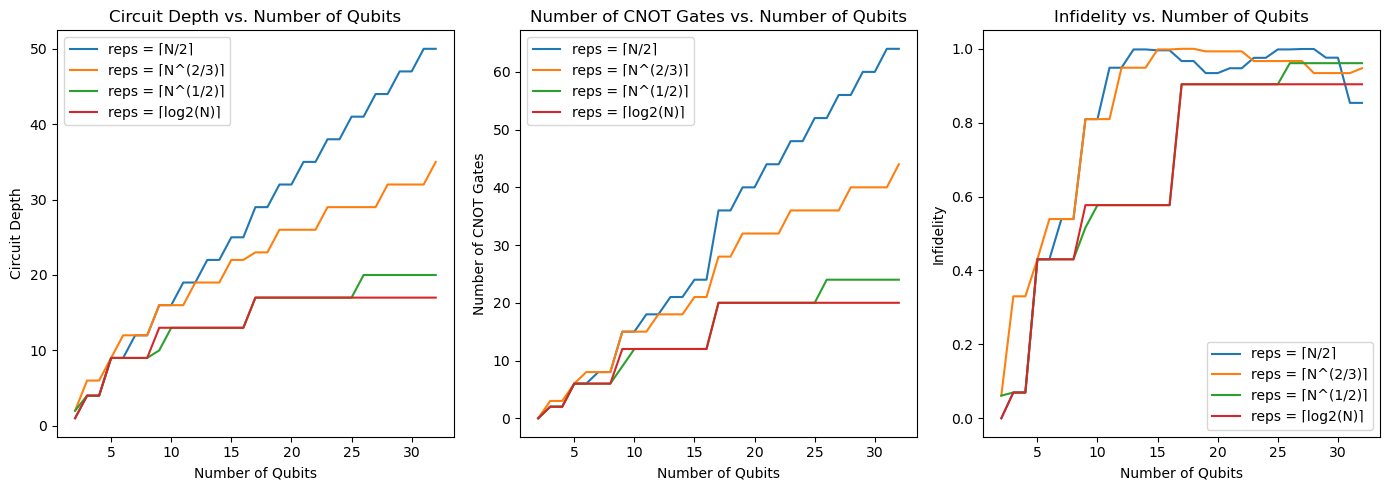

In [56]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())
depths = []
sizes = []
num_params = []
nlgates = []
infidelity_values = []

# Loop through repetitions
for rep in rep_list:
    depth = []
    size = []
    num_param = []
    nlgate = []
    infidelity_bfgs = []

    for N in range(2, 33):
        num_qubits = int(np.ceil(np.log2(N)))
        num_layers = repetitions[rep](N)
        
        ansatz_circuit = QuantumCircuit(num_qubits)
        for layer in range(num_layers):
            for qubit in range(num_qubits):
                ansatz_circuit.ry(theta, qubit)
            for qubit in range(num_qubits - 1):
                ansatz_circuit.cx(qubit, qubit + 1)

        # Create the target circuit with the same 'theta' parameter
        target_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            target_circuit.ry(theta, qubit)

        # Bind the parameter 'theta' to a specific value (e.g., theta = 0.5)
        parameter_bindings = {theta: 0.5}
        ansatz_circuit = ansatz_circuit.bind_parameters(parameter_bindings)
        target_circuit = target_circuit.bind_parameters(parameter_bindings)

        # Calculate circuit properties
        depth.append(ansatz_circuit.depth())
        size.append(num_qubits)
        num_param.append(num_qubits * num_layers)
        
        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0
        nlgate.append(nlgate_count)
        
        # Calculate infidelity
        backend = Aer.get_backend('statevector_simulator')
        job_ansatz = execute(ansatz_circuit, backend)
        job_target = execute(target_circuit, backend)
        result_ansatz = job_ansatz.result()
        result_target = job_target.result()
        psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)
        psi_target = result_target.get_statevector(target_circuit)
        fidelity = state_fidelity(psi_ansatz, psi_target)
        infidelity = 1 - fidelity
        infidelity_bfgs.append(infidelity)

    depths.append(depth)
    sizes.append(size)
    num_params.append(num_param)
    nlgates.append(nlgate)
    infidelity_values.append(infidelity_bfgs)

# Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
for i, rep in enumerate(rep_list):
    plt.plot(range(2, 33), depths[i], label=rep_comp[rep][1])
plt.xlabel('Number of Qubits')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Number of Qubits')
plt.legend()

plt.subplot(1, 3, 2)
for i, rep in enumerate(rep_list):
    plt.plot(range(2, 33), nlgates[i], label=rep_comp[rep][1])
plt.xlabel('Number of Qubits')
plt.ylabel('Number of CNOT Gates')
plt.title('Number of CNOT Gates vs. Number of Qubits')
plt.legend()

plt.subplot(1, 3, 3)
for i, rep in enumerate(rep_list):
    plt.plot(range(2, 33), infidelity_values[i], label=rep_comp[rep][1])
plt.xlabel('Number of Qubits')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Number of Qubits')
plt.legend()

plt.tight_layout()
plt.show()


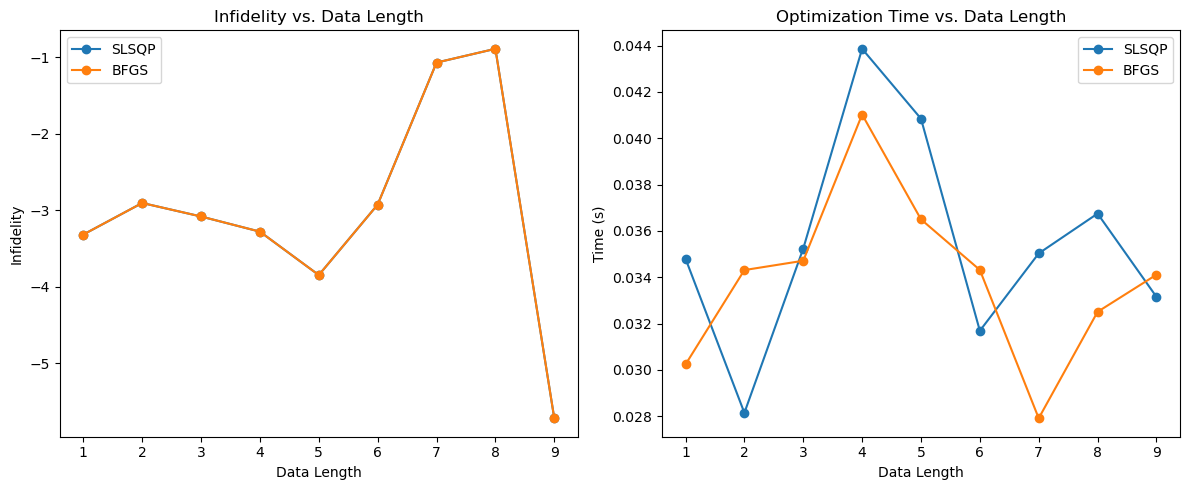

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the number of qubits
num_qubits = 5

# Initialize lists to store data
data_lengths = []
infidelity_values_slsqp = []
infidelity_values_bfgs = []
times_slsqp = []
times_bfgs = []

# Define a range of data lengths
data_lengths_range = range(1, 10)

# Loop through data lengths
for data_length in data_lengths_range:
    # Generate a complex dataset
    complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))[:data_length]
    complex_dataset /= np.linalg.norm(complex_dataset)

    # Create the ansatz circuit
    ansatz_circuit = QuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        ansatz_circuit.ry(theta, qubit)
    for qubit in range(num_qubits - 1):
        ansatz_circuit.cx(qubit, qubit + 1)

    # Bind the parameter 'theta' to a specific value (e.g., theta = 0.5)
    parameter_bindings = {theta: 0.5}
    ansatz_circuit = ansatz_circuit.bind_parameters(parameter_bindings)

    # Define the objective function to minimize infidelity
    def objective_function(params):
    # Create the target circuit with the same 'theta' parameter
       target_circuit = QuantumCircuit(num_qubits)
       for qubit in range(num_qubits):
        target_circuit.ry(params[0], qubit)

    # Calculate the fidelity with the complex dataset
       backend = Aer.get_backend('statevector_simulator')
       job_ansatz = execute(ansatz_circuit, backend)
       job_target = execute(target_circuit, backend)
       result_ansatz = job_ansatz.result()
       result_target = job_target.result()
       psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)
       psi_target = result_target.get_statevector(target_circuit)
       fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
       infidelity = 1 - fidelity
       return float(infidelity)
   
# Generate a complex dataset with the same length as the statevector
    complex_dataset = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)

    # Optimize the circuit parameters using SLSQP
    start_time = time.time()
    result_slsqp = minimize(objective_function, [0.5], method='SLSQP')
    end_time = time.time()
    infidelity_slsqp = result_slsqp.fun
    times_slsqp.append(end_time - start_time)
    infidelity_values_slsqp.append(infidelity_slsqp)

    # Optimize the circuit parameters using BFGS
    start_time = time.time()
    result_bfgs = minimize(objective_function, [0.5], method='BFGS')
    end_time = time.time()
    infidelity_bfgs = result_bfgs.fun
    times_bfgs.append(end_time - start_time)
    infidelity_values_bfgs.append(infidelity_bfgs)

    data_lengths.append(data_length)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(data_lengths, infidelity_values_slsqp, marker='o', label='SLSQP')
plt.plot(data_lengths, infidelity_values_bfgs, marker='o', label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(data_lengths, times_slsqp, marker='o', label='SLSQP')
plt.plot(data_lengths, times_bfgs, marker='o', label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend()

plt.tight_layout()
plt.show()


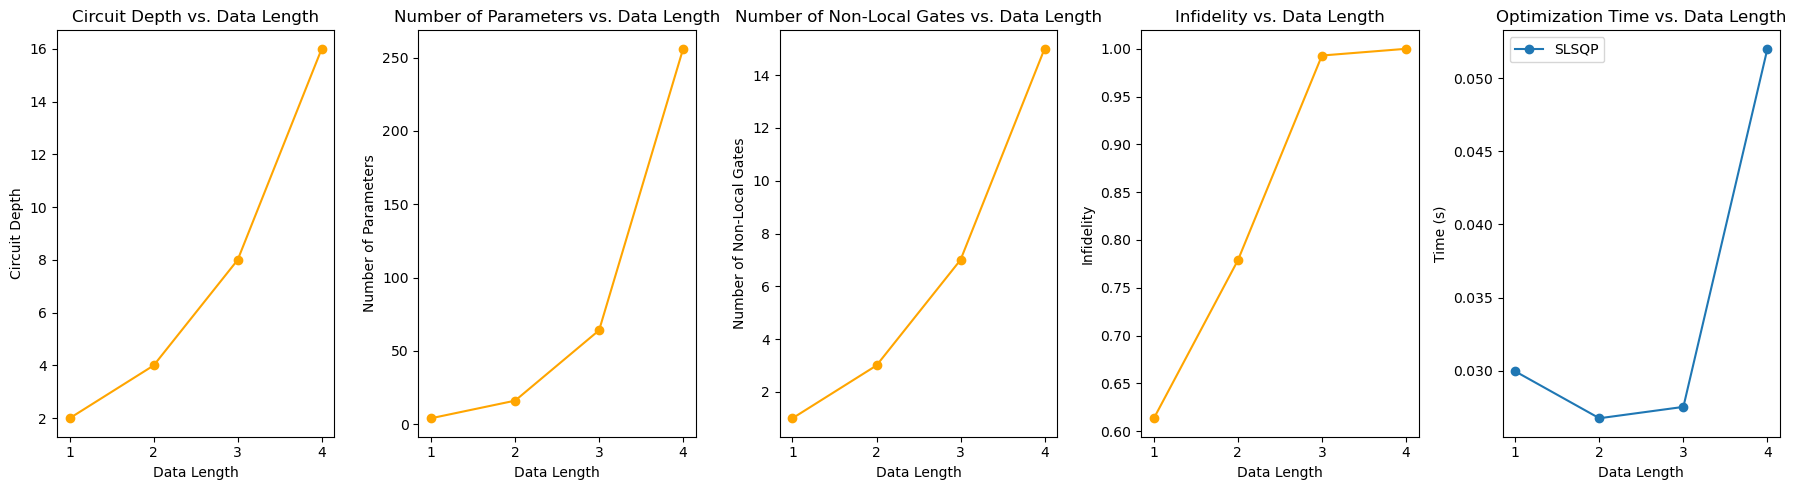

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Define a range of data lengths
data_lengths_range = range(1,5)

# Loop through data lengths
for data_length in data_lengths_range:
    # Define the number of qubits based on data length
    num_qubits = 2 ** data_length

    # Create the ansatz circuit
    ansatz_circuit = QuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        ansatz_circuit.ry(theta, qubit)
    for qubit in range(num_qubits - 1):
        ansatz_circuit.cx(qubit, qubit + 1)

    # Bind the parameter 'theta' to a specific value (e.g., theta = 0.5)
    parameter_bindings = {theta: 0.5}
    ansatz_circuit = ansatz_circuit.bind_parameters(parameter_bindings)

    # Generate a complex dataset with the same length as the statevector
    complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
    complex_dataset /= np.linalg.norm(complex_dataset)

    # Calculate circuit properties
    depth = ansatz_circuit.depth()
    num_param = num_qubits * depth

    if 'cx' in ansatz_circuit.count_ops():
        nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
    else:
        nlgate_count = 0  # If 'cx' gates are not present, set count to 0

    depths.append(depth)
    num_params.append(num_param)
    nlgates.append(nlgate_count)

    # Define the objective function to minimize infidelity
    def objective_function(params):
        # Create the target circuit with the same 'theta' parameter
        target_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            target_circuit.ry(params[0], qubit)

        # Calculate the fidelity with the complex dataset
        backend = Aer.get_backend('statevector_simulator')
        job_ansatz = execute(ansatz_circuit, backend)
        job_target = execute(target_circuit, backend)
        result_ansatz = job_ansatz.result()
        result_target = job_target.result()
        psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)
        psi_target = result_target.get_statevector(target_circuit)
        fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
        infidelity = 1 - fidelity
        return float(infidelity)

    # Optimize the circuit parameters using SLSQP
    start_time = time.time()
    result_slsqp = minimize(objective_function, [0.5], method='SLSQP')
    end_time = time.time()
    infidelity_slsqp = result_slsqp.fun
    infidelity_values_slsqp.append(infidelity_slsqp)
    times_slsqp.append(end_time - start_time)
    data_lengths.append(data_length)

# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.plot(data_lengths, depths, marker='o',label='SLSQP',color = 'orange')
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')

plt.subplot(1, 5, 2)
plt.plot(data_lengths, num_params, marker='o',label='SLSQP',color = 'orange')
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')

plt.subplot(1, 5, 3)
plt.plot(data_lengths, nlgates, marker='o', label='SLSQP',color = 'orange')
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')

plt.subplot(1, 5, 4)
plt.plot(data_lengths, infidelity_values_slsqp, marker='o', label='SLSQP',color = 'orange')
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')

plt.subplot(1, 5, 5)
plt.plot(data_lengths, times_slsqp, marker='o', label='SLSQP')
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend()

plt.tight_layout()
plt.show()


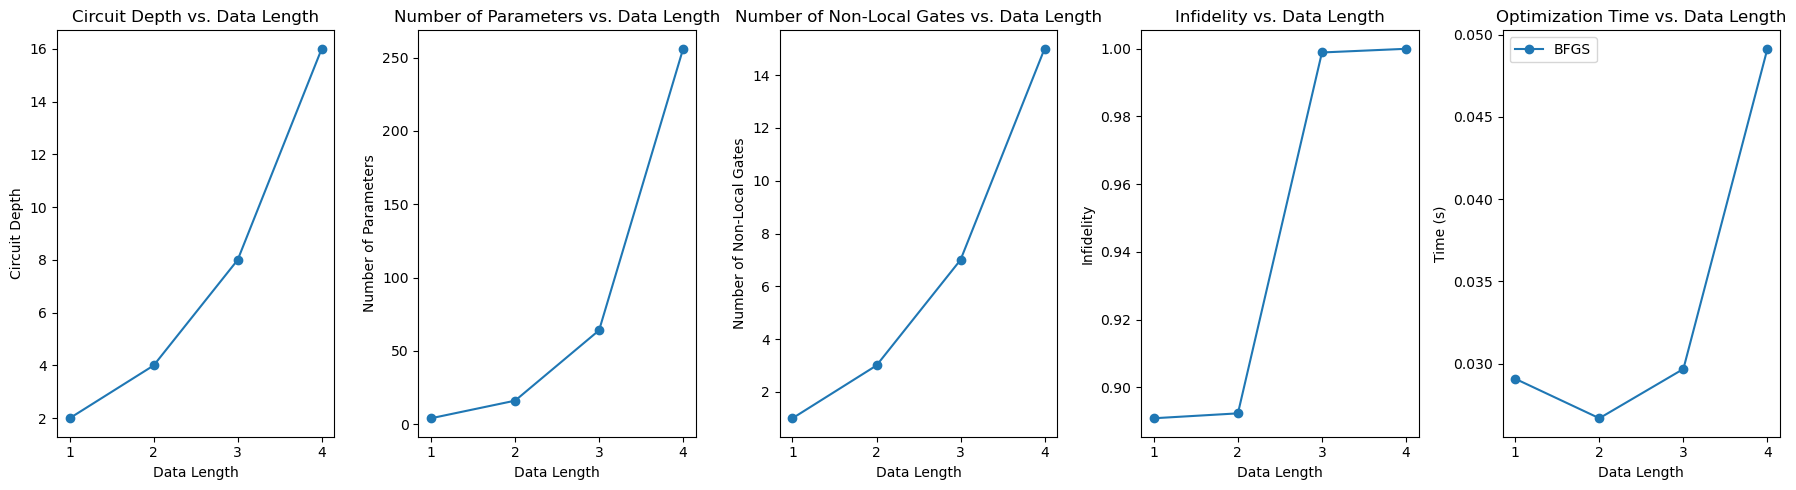

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Define a range of data lengths
data_lengths_range = range(1, 5)

# Loop through data lengths
for data_length in data_lengths_range:
    # Define the number of qubits based on data length
    num_qubits = 2 ** data_length

    # Create the ansatz circuit
    ansatz_circuit = QuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        ansatz_circuit.ry(theta, qubit)
    for qubit in range(num_qubits - 1):
        ansatz_circuit.cx(qubit, qubit + 1)

    # Bind the parameter 'theta' to a specific value (e.g., theta = 0.5)
    parameter_bindings = {theta: 0.5}
    ansatz_circuit = ansatz_circuit.bind_parameters(parameter_bindings)

    # Generate a complex dataset with the same length as the statevector
    complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
    complex_dataset /= np.linalg.norm(complex_dataset)

    # Calculate circuit properties
    depth = ansatz_circuit.depth()
    num_param = num_qubits * depth

    if 'cx' in ansatz_circuit.count_ops():
        nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
    else:
        nlgate_count = 0  # If 'cx' gates are not present, set count to 0

    depths.append(depth)
    num_params.append(num_param)
    nlgates.append(nlgate_count)

    # Define the objective function to minimize infidelity
    def objective_function(params):
        # Create the target circuit with the same 'theta' parameter
        target_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            target_circuit.ry(params[0], qubit)

        # Calculate the fidelity with the complex dataset
        backend = Aer.get_backend('statevector_simulator')
        job_ansatz = execute(ansatz_circuit, backend)
        job_target = execute(target_circuit, backend)
        result_ansatz = job_ansatz.result()
        result_target = job_target.result()
        psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)
        psi_target = result_target.get_statevector(target_circuit)
        fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
        infidelity = 1 - fidelity
        return float(infidelity)

    # Optimize the circuit parameters using SLSQP
    start_time = time.time()
    result_slsqp = minimize(objective_function, [0.5], method='BFGS')
    end_time = time.time()
    infidelity_slsqp = result_slsqp.fun
    infidelity_values_slsqp.append(infidelity_slsqp)
    times_slsqp.append(end_time - start_time)
    data_lengths.append(data_length)

# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.plot(data_lengths, depths, marker='o',label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')

plt.subplot(1, 5, 2)
plt.plot(data_lengths, num_params, marker='o',label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')

plt.subplot(1, 5, 3)
plt.plot(data_lengths, nlgates, marker='o', label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')

plt.subplot(1, 5, 4)
plt.plot(data_lengths, infidelity_values_slsqp, marker='o', label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')

plt.subplot(1, 5, 5)
plt.plot(data_lengths, times_slsqp, marker='o', label='BFGS')
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend()

plt.tight_layout()
plt.show()


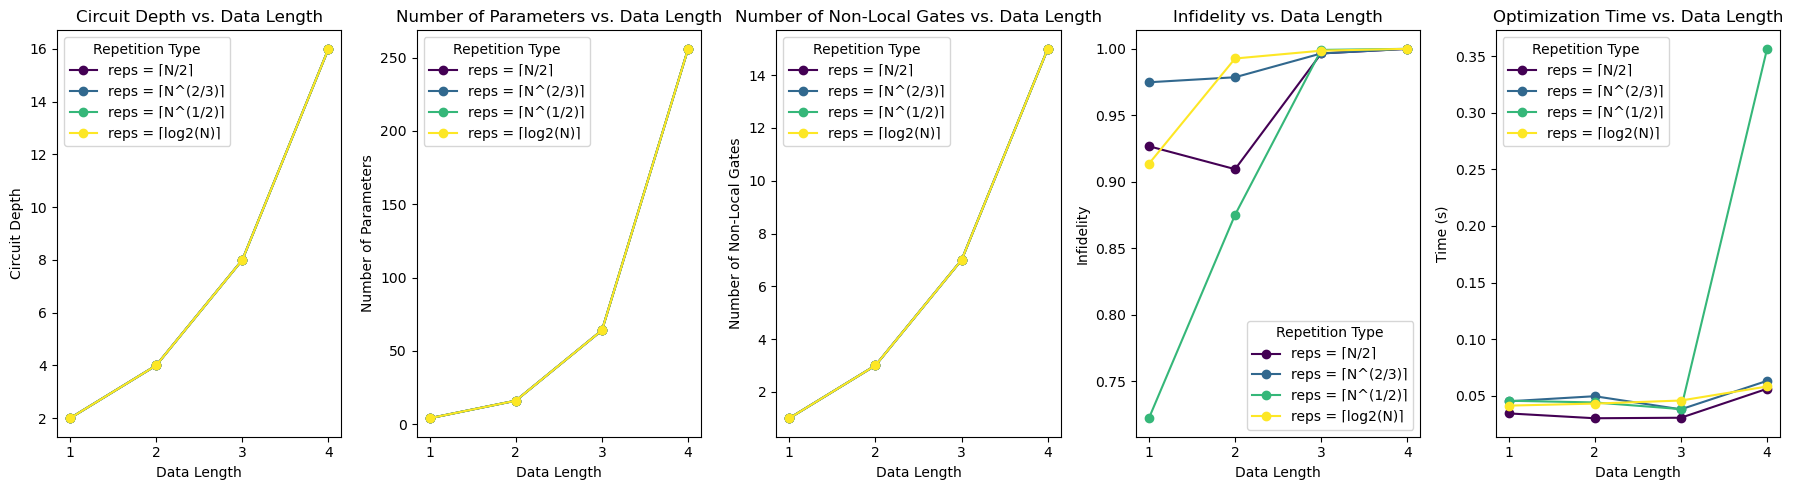

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())

# Create a color cycle for different repetitions
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(rep_list)))

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Loop through each repetition type
for rep_type in rep_list:
    # Define a range of data lengths
    data_lengths_range = range(1, 5)
    
    # Initialize lists for the current repetition type
    depths_rep = []
    num_params_rep = []
    nlgates_rep = []
    infidelity_values_slsqp_rep = []
    times_slsqp_rep = []

    # Loop through data lengths
    for data_length in data_lengths_range:
        # Define the number of qubits based on data length
        num_qubits = 2 ** data_length

        # Determine the number of repetitions based on the current repetition type
        reps = repetitions[rep_type](num_qubits)

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            ansatz_circuit.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Bind the parameter 'theta' to a specific value (e.g., theta = 0.5)
        parameter_bindings = {theta: 0.5}
        ansatz_circuit = ansatz_circuit.bind_parameters(parameter_bindings)

        # Generate a complex dataset with the same length as the statevector
        complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0

        depths_rep.append(depth)
        num_params_rep.append(num_param)
        nlgates_rep.append(nlgate_count)
        

        # Define the objective function to minimize infidelity
        def objective_function(params):
            # Create the target circuit with the same 'theta' parameter
            target_circuit = QuantumCircuit(num_qubits)
            for qubit in range(num_qubits):
                target_circuit.ry(params[0], qubit)

            # Calculate the fidelity with the complex dataset
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            job_target = execute(target_circuit, backend)
            result_ansatz = job_ansatz.result()
            result_target = job_target.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)
            psi_target = result_target.get_statevector(target_circuit)
            fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [0.5], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_rep.append(infidelity_slsqp)
        times_slsqp_rep.append(end_time - start_time)

    # Append data for the current repetition type to the main lists
    depths.append(depths_rep)
    num_params.append(num_params_rep)
    nlgates.append(nlgates_rep)
    infidelity_values_slsqp.append(infidelity_values_slsqp_rep)
    times_slsqp.append(times_slsqp_rep)
    data_lengths.append(list(data_lengths_range))  # Append the list of data lengths

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 5, 1)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], depths[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 5, 2)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], num_params[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 5, 3)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], nlgates[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Infidelity vs. Data Length
plt.subplot(1, 5, 4)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], infidelity_values_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 5, 5)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], times_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Repetition Type')

plt.tight_layout()
plt.show()


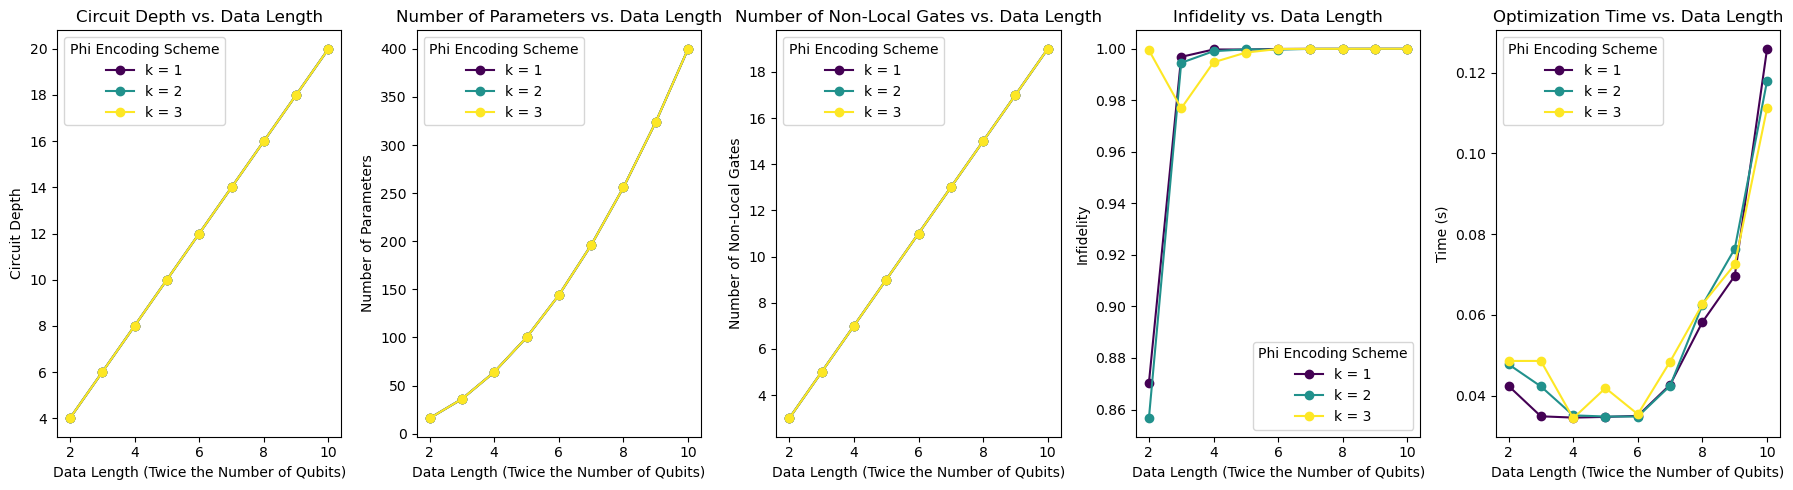

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define kernel functions
def eq_8(x, k):
    if k == 1:
        phi = x[0]
    elif k == 2:
        phi = x[0] if len(x) == 1 else x[0] * x[1]
    elif k == 3:
        phi = x[0] if len(x) == 1 else x[0] * x[1] * x[2]
    return (np.pi / 2) * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Iterate over different encoding schemes (k values)
for k_value in range(1,4): 
    # Initialize lists for the current 'phi' encoding scheme
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []

    # Iterate over different data lengths
    for data_length in data_lengths:
        # Define the number of qubits (twice the data length)
        num_qubits = 2 * data_length

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_8([np.pi / 2], k_value), qubit)  # Use eq_8 to set phi

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset for the current 'phi' encoding scheme
        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params):
            # Calculate the fidelity with the complex dataset
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_8(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

    # Append data for the current 'phi' encoding scheme to the main lists
    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 5, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 5, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 5, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 5, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 5, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, times_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()


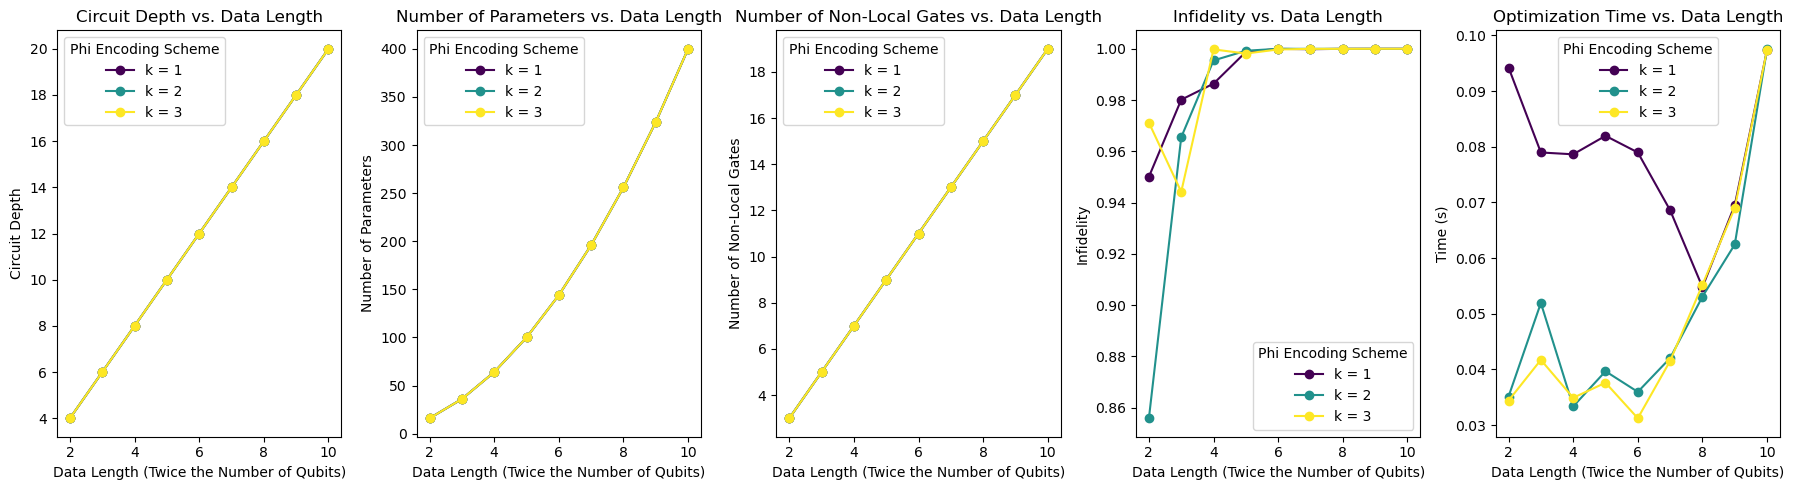

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define kernel functions (eq_9, eq_9_1, eq_9_2)
def eq_9(x, k):
    if k == 1:
        phi = 1 - x[0]
    elif k == 2:
        phi = x[0] if len(x) == 1 else (1 - x[0]) * (1 - x[1])
    elif k == 3:
        phi = x[0] if len(x) == 1 else (1 - x[0]) * (1 - x[1]) * (1 - x[2])
    return (np.pi / 2) * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):  # You can adjust the range of k values as needed
    # Initialize lists for the current 'phi' encoding scheme
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []

    # Iterate over different data lengths
    for data_length in data_lengths:
        # Define the number of qubits (twice the data length)
        num_qubits = 2 * data_length

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_9([np.pi / 2], k_value), qubit)  # Use eq_9 to set phi

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset for the current 'phi' encoding scheme
        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params):
            # Calculate the fidelity with the complex dataset
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_9(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

    # Append data for the current 'phi' encoding scheme to the main lists
    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 5, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 5, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 5, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 5, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 5, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, times_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()


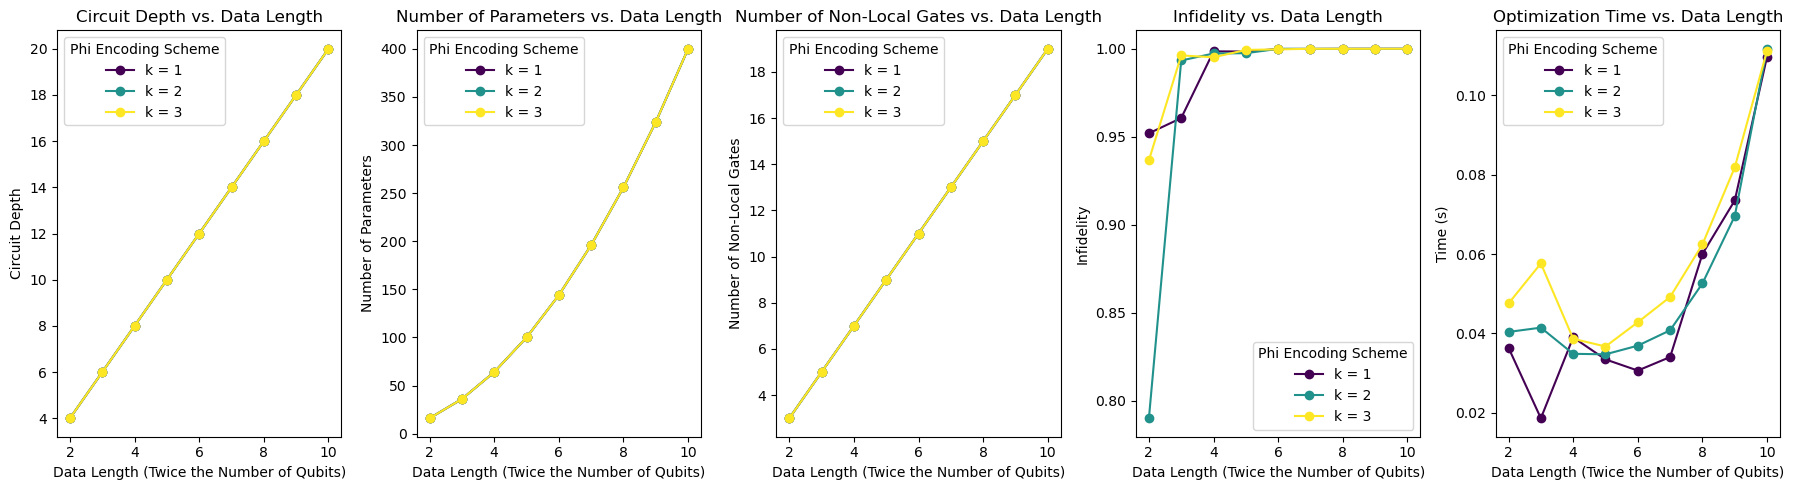

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define kernel functions (eq_10, eq_10_1, eq_10_2)
def eq_10(x, k):
    if k == 1:
        phi = np.exp(np.square(x[0]) / 8)
    elif k == 2:
        phi = x[0] if len(x) == 1 else np.exp(np.square(x[0] - x[1]) / 8)
    elif k == 3:
        phi = x[0] if len(x) == 1 else (np.exp(np.square(x[0] - x[1]) / 8) +
                                         np.exp(np.square(x[1] - x[2]) / 8) +
                                         np.exp(np.square(x[2] - x[0]) / 8))
    return np.pi * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):  # You can adjust the range of k values as needed
    # Initialize lists for the current 'phi' encoding scheme
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []

    # Iterate over different data lengths
    for data_length in data_lengths:
        # Define the number of qubits (twice the data length)
        num_qubits = 2 * data_length

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_10([np.pi / 2], k_value), qubit)  # Use eq_10 to set phi

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset for the current 'phi' encoding scheme
        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params):
            # Calculate the fidelity with the complex dataset
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_10(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

    # Append data for the current 'phi' encoding scheme to the main lists
    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 5, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 5, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 5, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 5, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 5, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, times_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()


In [129]:
pip install qiskit-ignis


     ---------------------------------------- 0.0/198.7 kB ? eta -:--:--
     ------------------------------------- 198.7/198.7 kB 11.8 MB/s eta 0:00:00
  Obtaining dependency information for retworkx>=0.8.0 from https://files.pythonhosted.org/packages/01/65/3f52d88a2218a8fa85c0a79184038ba27baef9fa2d4454169536f2f3c249/retworkx-0.13.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


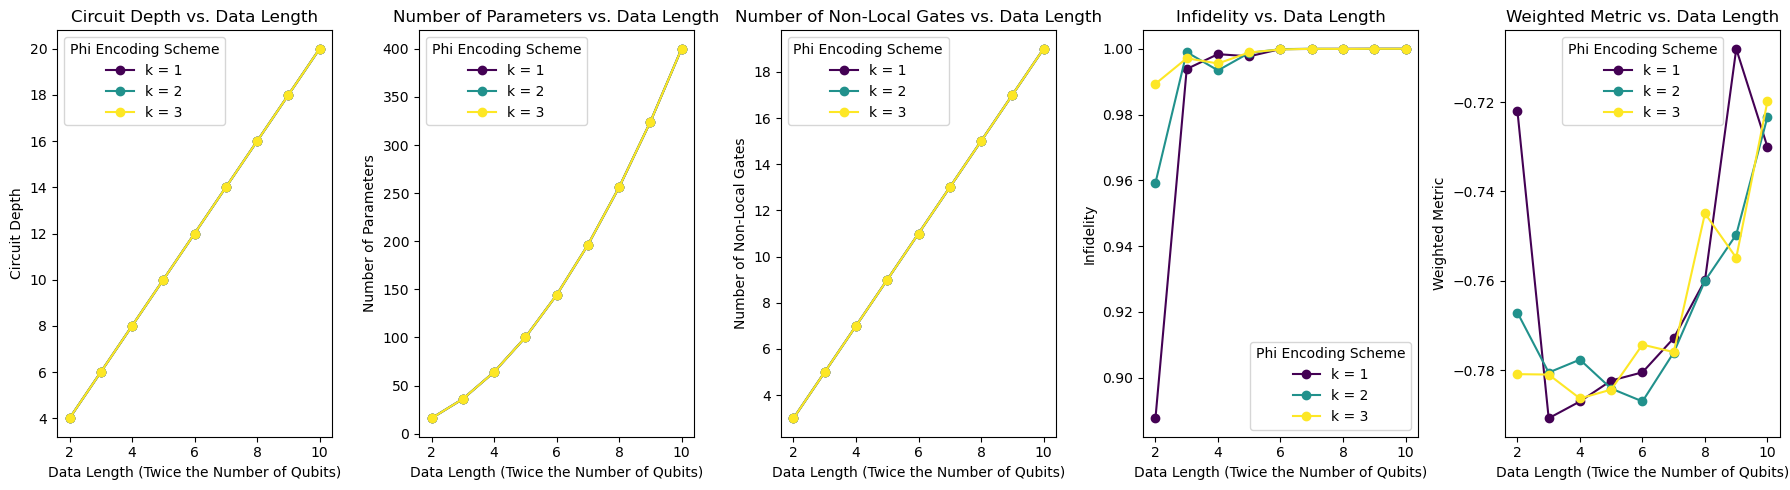

Best Configurations (k values): [9, 10, 10]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from scipy.optimize import minimize
import time

# Define kernel functions (eq_10, eq_10_1, eq_10_2)
def eq_10(x, k):
    if k == 1:
        phi = np.exp(np.square(x[0]) / 8)
    elif k == 2:
        phi = x[0] if len(x) == 1 else np.exp(np.square(x[0] - x[1]) / 8)
    elif k == 3:
        phi = x[0] if len(x) == 1 else (np.exp(np.square(x[0] - x[1]) / 8) +
                                         np.exp(np.square(x[1] - x[2]) / 8) +
                                         np.exp(np.square(x[2] - x[0]) / 8))
    return np.pi * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Define weights for the metric
weight_infidelity = 0.7  # You can adjust the weight based on importance
weight_time = 0.8  # You can adjust the weight based on importance
weight_depth = 0.01  # You can adjust the weight based on importance
weight_parameters = 0.01  # You can adjust the weight based on importance
weight_nlgates = 0.1 # You can adjust the weight based on importance

# Initialize a list to store the weighted metric values
weighted_metrics = []

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []

    for data_length in data_lengths:
        num_qubits = 2 * data_length

        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_10([np.pi / 2], k_value), qubit)

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        def objective_function(params):
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_10(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)

# Calculate the weighted metric values for each configuration
for i in range(3):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths))
    ]
    weighted_metrics.append(weighted_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 5, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 5, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 5, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 5, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Weighted Metric vs. Data Length
plt.subplot(1, 5, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, weighted_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Weighted Metric')
plt.title('Weighted Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()

# Find the best configuration for each k value
best_configurations = [data_lengths[np.argmax(weighted_metrics[i])] for i in range(3)]
print("Best Configurations (k values):", best_configurations)


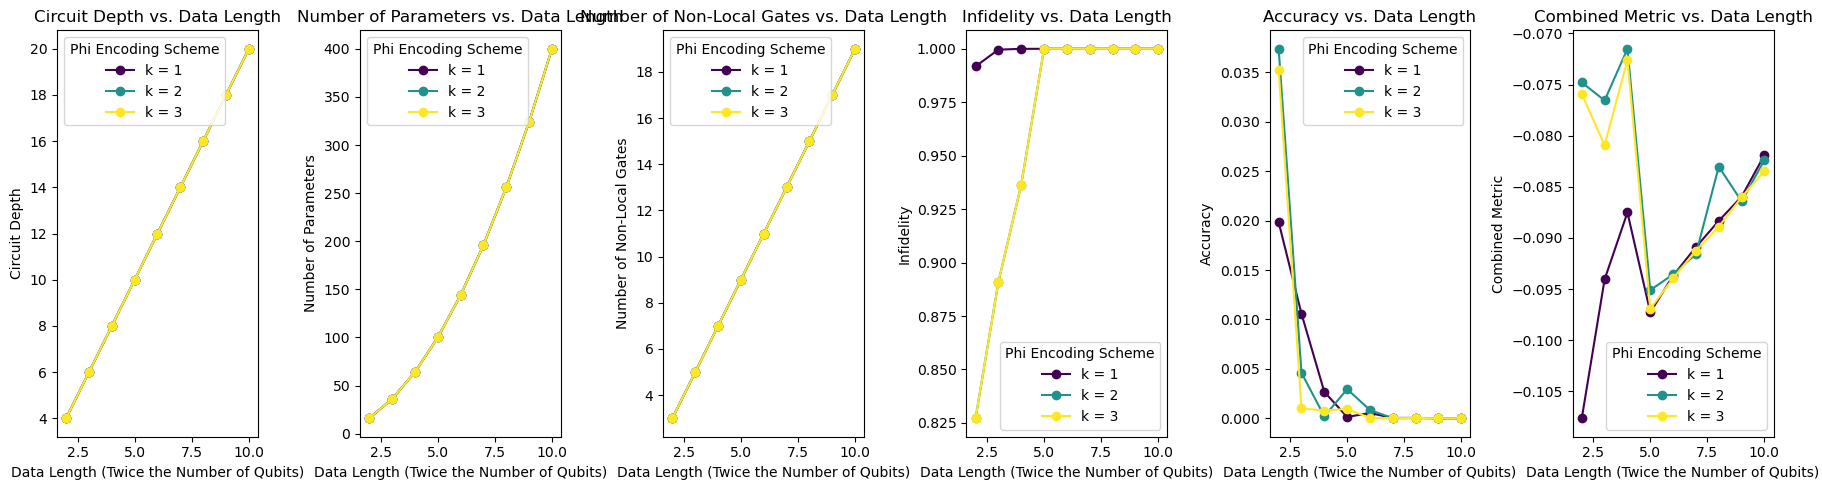

Best Configurations (k values): [10, 4, 4]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from scipy.optimize import minimize
import time

# Define kernel functions (eq_10, eq_10_1, eq_10_2)
def eq_10(x, k):
    if k == 1:
        phi = np.exp(np.square(x[0]) / 8)
    elif k == 2:
        phi = x[0] if len(x) == 1 else np.exp(np.square(x[0] - x[1]) / 8)
    elif k == 3:
        phi = x[0] if len(x) == 1 else (np.exp(np.square(x[0] - x[1]) / 8) +
                                         np.exp(np.square(x[1] - x[2]) / 8) +
                                         np.exp(np.square(x[2] - x[0]) / 8))
    return np.pi * phi

# Initialize lists to store data
data_lengths = list (range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

weight_infidelity = 0.2  # Adjust based on importance
weight_time = 0.2  # Adjust based on importance
weight_depth = 0.1  # Adjust based on importance
weight_parameters = 0.1  # Adjust based on importance
weight_nlgates = 0.4  # Adjust based on importance
weight_accuracy = 0.6

# Define weights for the metric
# weight_infidelity = 0.7  # You can adjust the weight based on importance
# weight_time = 0.8  # You can adjust the weight based on importance
# weight_depth = 0.01  # You can adjust the weight based on importance
# weight_parameters = 0.01  # You can adjust the weight based on importance
# weight_nlgates = 0.1  # You can adjust the weight based on importance
# weight_accuracy = 0.9  # You can adjust the weight based on importance

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []
    accuracies_k = []

    for data_length in data_lengths:
        num_qubits = 2 * data_length

        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_10([np.pi / 2], k_value), qubit)

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)
        
        target_circuit = QuantumCircuit(num_qubits)    

        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)
        
        backend = Aer.get_backend('statevector_simulator')

        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        def objective_function(params):
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_10(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), psi_target).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

        # Calculate accuracy using a validation dataset (here we use fidelity as accuracy)
        validation_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        validation_dataset /= np.linalg.norm(validation_dataset)
        
        job_target = execute(target_circuit, backend)
        result_target = job_target.result()
        psi_target = result_target.get_statevector(target_circuit)
        
        fidelity = np.abs(np.dot(np.conj(psi_target), validation_dataset).flatten()) ** 2
        accuracy = fidelity  # Accuracy is calculated as fidelity for this example
        accuracies_k.append(accuracy)

    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)
    accuracies.append(accuracies_k)

# Calculate the weighted metric values for each configuration
for i in range(3):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.4

combined_metrics = []

for i in range(3):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)
 
# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 6, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 6, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 6, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 6, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Accuracy vs. Data Length
plt.subplot(1, 6, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, accuracies[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 6, 6)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, combined_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()

# Find the best configuration for each k value
best_configurations = [data_lengths[np.argmax(combined_metrics[i])] for i in range(3)]
print("Best Configurations (k values):", best_configurations)


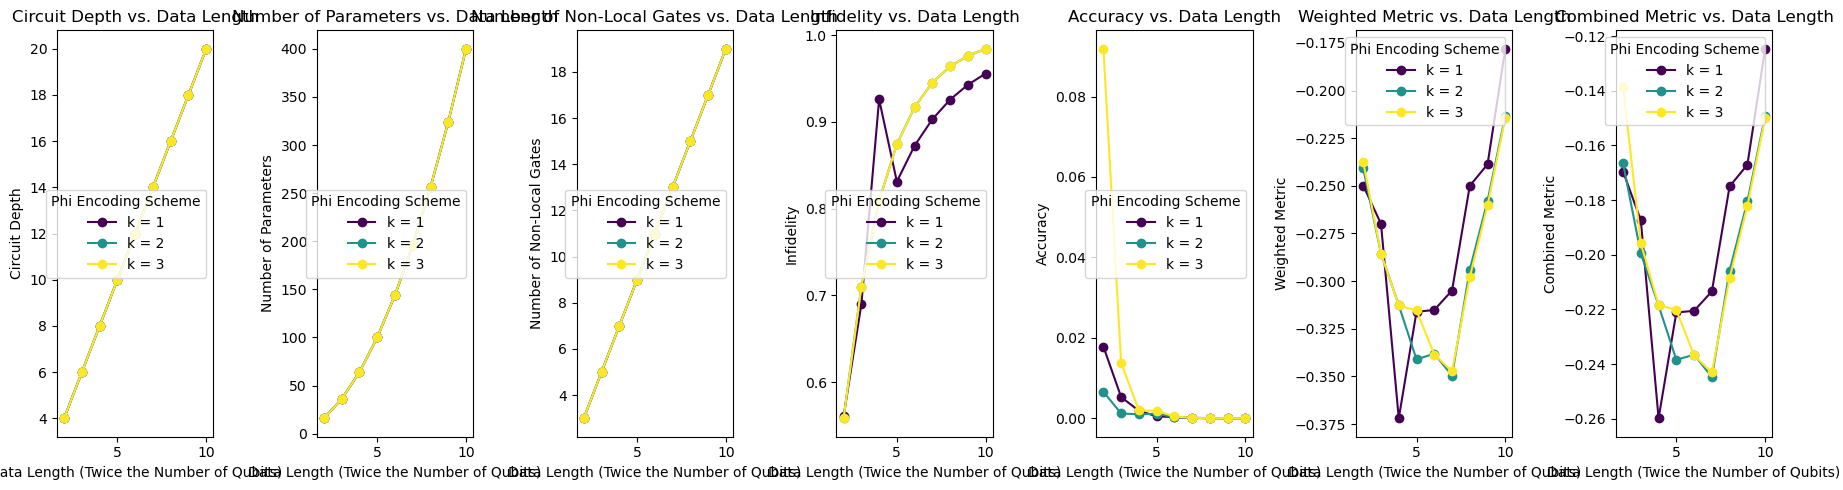

Best Configurations (k values): [10, 10, 2]


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from scipy.optimize import minimize
import time

# Define kernel functions (eq_9, eq_9_1, eq_9_2)
def eq_9(x, k):
    if k == 1:
        phi = 1 - x[0]
    elif k == 2:
        phi = x[0] if len(x) == 1 else (1 - x[0]) * (1 - x[1])
    elif k == 3:
        phi = x[0] if len(x) == 1 else (1 - x[0]) * (1 - x[1]) * (1 - x[2])
    return (np.pi / 2) * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Define weights for the metric
weight_infidelity = 0.7  # You can adjust the weight based on importance
weight_time = 0.8  # You can adjust the weight based on importance
weight_depth = 0.01  # You can adjust the weight based on importance
weight_parameters = 0.01  # You can adjust the weight based on importance
weight_nlgates = 0.1  # You can adjust the weight based on importance
weight_accuracy = 0.3  # You can adjust the weight based on importance

total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates

# Normalize the weights to ensure they add up to 1.
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []
    accuracies_k = []

    for data_length in data_lengths:
        num_qubits = 2 * data_length

        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_9([np.pi / 2], k_value), qubit)

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        target_circuit = QuantumCircuit(num_qubits)

        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        backend = Aer.get_backend('statevector_simulator')

        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        def objective_function(params):
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_9(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), psi_target).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

        # Calculate accuracy using a validation dataset (here we use fidelity as accuracy)
        validation_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        validation_dataset /= np.linalg.norm(validation_dataset)

        job_target = execute(target_circuit, backend)
        result_target = job_target.result()
        psi_target = result_target.get_statevector(target_circuit)

        fidelity = np.abs(np.dot(np.conj(psi_target), validation_dataset).flatten()) ** 2
        accuracy = fidelity  # Accuracy is calculated as fidelity for this example
        accuracies_k.append(accuracy)

    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)
    accuracies.append(accuracies_k)

# Calculate the weighted metric values for each configuration
for i in range(3):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(3):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 7, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 7, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 7, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 7, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Accuracy vs. Data Length
plt.subplot(1, 7, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, accuracies[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Weighted Metric vs. Data Length
plt.subplot(1, 7, 6)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, weighted_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Weighted Metric')
plt.title('Weighted Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 7, 7)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, combined_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()

# Find the best configuration for each k value
best_configurations = [data_lengths[np.argmax(combined_metrics[i])] for i in range(3)]
print("Best Configurations (k values):", best_configurations)


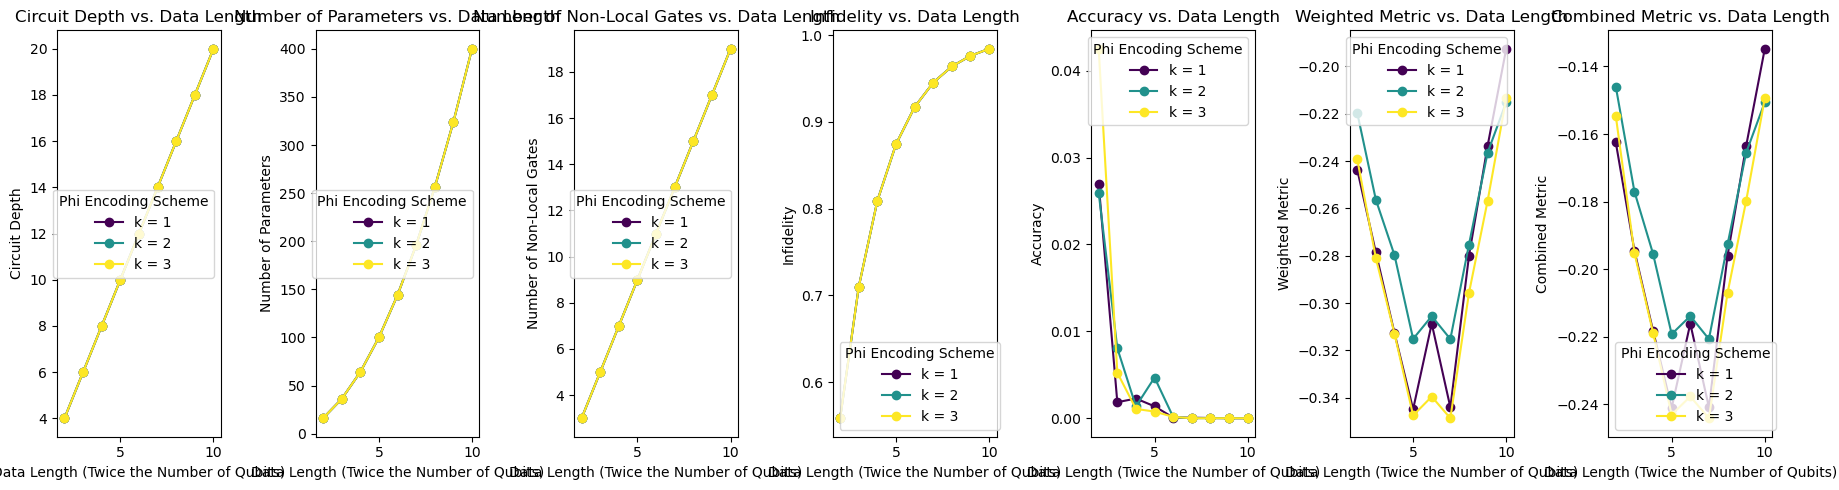

Best Configurations (k values): [10, 2, 10]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from scipy.optimize import minimize
import time

# Define kernel functions (eq_8, eq_8_1, eq_8_2)
def eq_8(x, k):
    if k == 1:
        phi = x[0]
    elif k == 2:
        phi = x[0] if len(x) == 1 else x[0] * x[1]
    elif k == 3:
        phi = x[0] if len(x) == 1 else x[0] * x[1] * x[2]
    return (np.pi / 2) * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Define weights for the metric
weight_infidelity = 0.7  # You can adjust the weight based on importance
weight_time = 0.8  # You can adjust the weight based on importance
weight_depth = 0.01  # You can adjust the weight based on importance
weight_parameters = 0.01  # You can adjust the weight based on importance
weight_nlgates = 0.1  # You can adjust the weight based on importance
weight_accuracy = 0.3  # You can adjust the weight based on importance

total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates

# Normalize the weights to ensure they add up to 1.
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []
    accuracies_k = []

    for data_length in data_lengths:
        num_qubits = 2 * data_length

        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_8([np.pi / 2], k_value), qubit)

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        target_circuit = QuantumCircuit(num_qubits)

        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        backend = Aer.get_backend('statevector_simulator')

        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        def objective_function(params):
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_8(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), psi_target).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

        # Calculate accuracy using a validation dataset (here we use fidelity as accuracy)
        validation_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        validation_dataset /= np.linalg.norm(validation_dataset)

        job_target = execute(target_circuit, backend)
        result_target = job_target.result()
        psi_target = result_target.get_statevector(target_circuit)

        fidelity = np.abs(np.dot(np.conj(psi_target), validation_dataset).flatten()) ** 2
        accuracy = fidelity  # Accuracy is calculated as fidelity for this example
        accuracies_k.append(accuracy)

    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)
    accuracies.append(accuracies_k)

# Calculate the weighted metric values for each configuration
for i in range(3):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(3):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 7, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 7, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 7, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 7, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Accuracy vs. Data Length
plt.subplot(1, 7, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, accuracies[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Weighted Metric vs. Data Length
plt.subplot(1, 7, 6)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, weighted_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Weighted Metric')
plt.title('Weighted Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 7, 7)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, combined_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()

# Find the best configuration for each k value
best_configurations = [data_lengths[np.argmax(combined_metrics[i])] for i in range(3)]
print("Best Configurations (k values):", best_configurations)


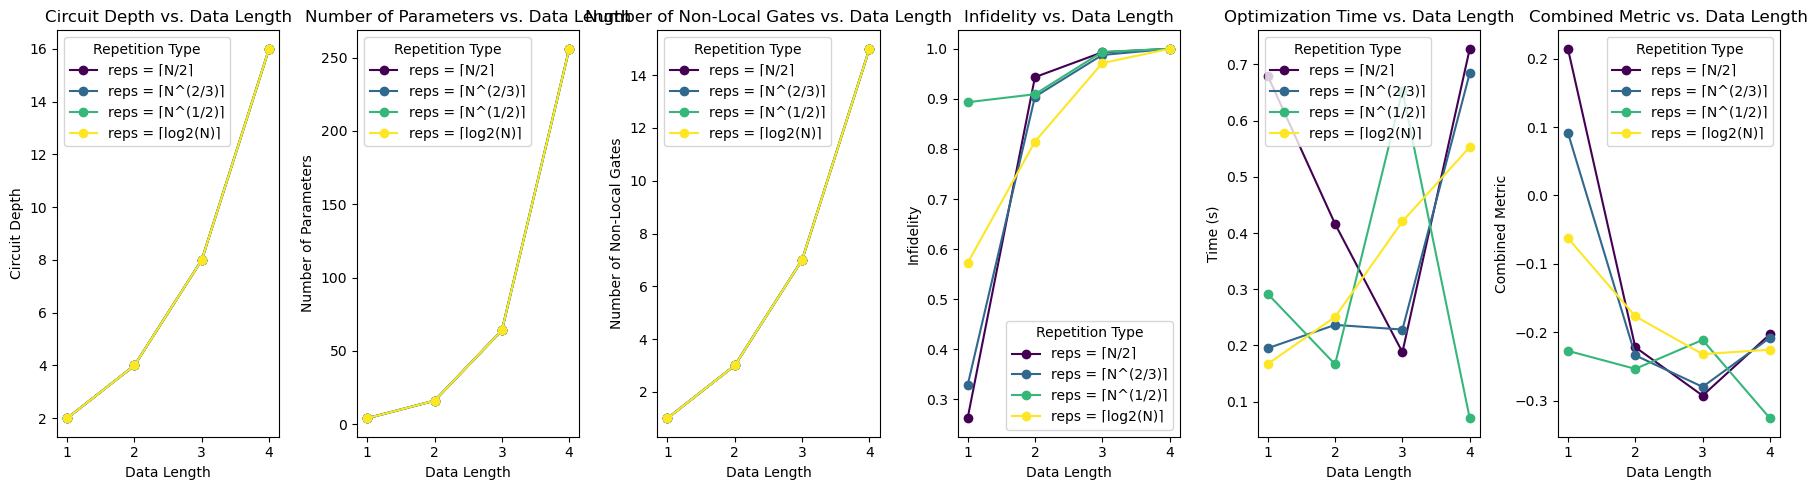

Best Configurations (Repetition Types): [1, 1, 3, 1]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())

# Create a color cycle for different repetitions
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(rep_list)))

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Define weights for the metric
weight_infidelity = 0.7  # You can adjust the weight based on importance
weight_time = 0.8  # You can adjust the weight based on importance
weight_depth = 0.01  # You can adjust the weight based on importance
weight_parameters = 0.01  # You can adjust the weight based on importance
weight_nlgates = 0.1  # You can adjust the weight based on importance
weight_accuracy = 0.3  # You can adjust the weight based on importance

# Normalize the weights to ensure they add up to 1.
total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Loop through each repetition type
for rep_type in rep_list:
    # Define a range of data lengths
    data_lengths_range = range(1, 5)
    
    # Initialize lists for the current repetition type
    depths_rep = []
    num_params_rep = []
    nlgates_rep = []
    infidelity_values_slsqp_rep = []
    times_slsqp_rep = []
    accuracies_rep = []

    # Loop through data lengths
    for data_length in data_lengths_range:
        # Define the number of qubits based on data length
        num_qubits = 2 ** data_length

        # Determine the number of repetitions based on the current repetition type
        reps = repetitions[rep_type](num_qubits)

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            ansatz_circuit.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset with the same length as the statevector
        complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0

        depths_rep.append(depth)
        num_params_rep.append(num_param)
        nlgates_rep.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params):
            # Create the target circuit with the 'theta' parameter bound to the value
            target_circuit = QuantumCircuit(num_qubits)
            for qubit in range(num_qubits):
                target_circuit.ry(params[0], qubit)

            # Bind the 'theta' parameter to the current value in the ansatz circuit
            parameter_bindings = {theta: params[0]}
            ansatz_circuit_with_binding = ansatz_circuit.bind_parameters(parameter_bindings)

            # Calculate the fidelity with the complex dataset
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit_with_binding, backend)
            job_target = execute(target_circuit, backend)
            result_ansatz = job_ansatz.result()
            result_target = job_target.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit_with_binding)
            psi_target = result_target.get_statevector(target_circuit)
            fidelity = np.abs(np.dot(np.conj(psi_ansatz), complex_dataset).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [0.5], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_rep.append(infidelity_slsqp)
        times_slsqp_rep.append(end_time - start_time)

        # Calculate accuracy using the fidelity score
        fidelity = 1 - infidelity_slsqp
        accuracies_rep.append(fidelity)

    # Append data for the current repetition type to the main lists
    depths.append(depths_rep)
    num_params.append(num_params_rep)
    nlgates.append(nlgates_rep)
    infidelity_values_slsqp.append(infidelity_values_slsqp_rep)
    times_slsqp.append(times_slsqp_rep)
    data_lengths.append(list(data_lengths_range))  # Append the list of data lengths
    accuracies.append(accuracies_rep)

# Calculate the weighted metric values for each configuration
for i in range(len(rep_list)):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths[i]))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(len(rep_list)):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 6, 1)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], depths[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 6, 2)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], num_params[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 6, 3)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], nlgates[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Infidelity vs. Data Length
plt.subplot(1, 6, 4)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], infidelity_values_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 6, 5)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], times_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 6, 6)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], combined_metrics[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Repetition Type')

plt.tight_layout()
plt.show()

# Find the best configuration for each repetition type
best_configurations = [data_lengths[i][np.argmax(combined_metrics[i])] for i in range(len(rep_list))]
print("Best Configurations (Repetition Types):", best_configurations)


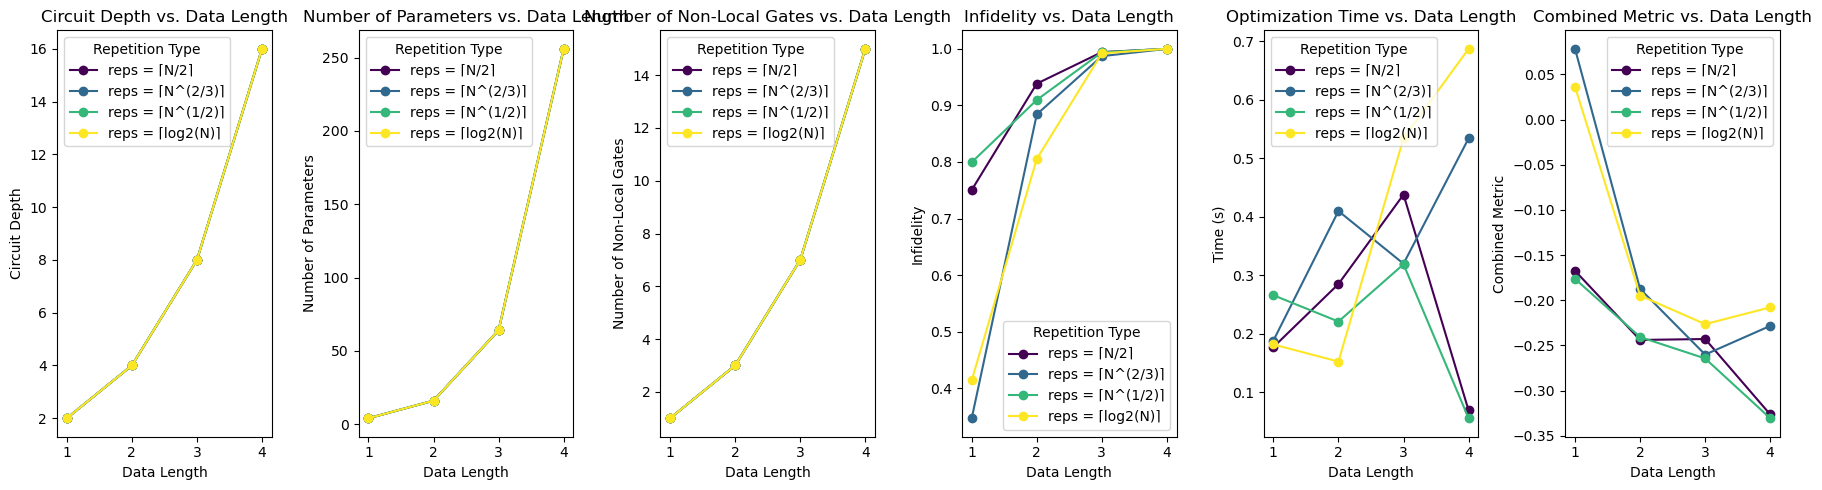

Best Configurations (Repetition Types): [1, 1, 1, 1]


: 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())

# Create a color cycle for different repetitions
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(rep_list)))

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Define weights for the metric
weight_infidelity = 0.7  # You can adjust the weight based on importance
weight_time = 0.8  # You can adjust the weight based on importance
weight_depth = 0.01  # You can adjust the weight based on importance
weight_parameters = 0.01  # You can adjust the weight based on importance
weight_nlgates = 0.1  # You can adjust the weight based on importance
weight_accuracy = 0.3  # You can adjust the weight based on importance

# Normalize the weights to ensure they add up to 1.
total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Loop through each repetition type
for rep_type in rep_list:
    # Define a range of data lengths
    data_lengths_range = range(1, 5)
    
    # Initialize lists for the current repetition type
    depths_rep = []
    num_params_rep = []
    nlgates_rep = []
    infidelity_values_slsqp_rep = []
    times_slsqp_rep = []
    accuracies_rep = []

    # Loop through data lengths
    for data_length in data_lengths_range:
        # Define the number of qubits based on data length
        num_qubits = 2 ** data_length

        # Determine the number of repetitions based on the current repetition type
        reps = repetitions[rep_type](num_qubits)

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            ansatz_circuit.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset with the same length as the statevector
        complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']  # Count CNOT gates
        else:
            nlgate_count = 0  # If 'cx' gates are not present, set count to 0

        depths_rep.append(depth)
        num_params_rep.append(num_param)
        nlgates_rep.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params, data):
            # Create the target circuit with the 'theta' parameter bound to the value
            target_circuit = QuantumCircuit(num_qubits)
            for qubit in range(num_qubits):
                target_circuit.ry(params[0], qubit)

            # Bind the 'theta' parameter to the current value in the ansatz circuit
            parameter_bindings = {theta: params[0]}
            ansatz_circuit_with_binding = ansatz_circuit.bind_parameters(parameter_bindings)

            # Calculate the fidelity with the complex dataset
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit_with_binding, backend)
            job_target = execute(target_circuit, backend)
            result_ansatz = job_ansatz.result()
            result_target = job_target.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit_with_binding)
            psi_target = result_target.get_statevector(target_circuit)

            # Ensure that 'data' has the correct shape for the dot product
            data = data.flatten()  # Flatten data to match the shape of psi_ansatz

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), data)) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Generate a validation dataset
        validation_data = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
        validation_data /= np.linalg.norm(validation_data)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [0.5], method='BFGS', args=(validation_data,))
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_rep.append(infidelity_slsqp)
        times_slsqp_rep.append(end_time - start_time)

        # Calculate accuracy using the fidelity score
        fidelity = 1 - infidelity_slsqp
        accuracies_rep.append(fidelity)

    # Append data for the current repetition type to the main lists
    depths.append(depths_rep)
    num_params.append(num_params_rep)
    nlgates.append(nlgates_rep)
    infidelity_values_slsqp.append(infidelity_values_slsqp_rep)
    times_slsqp.append(times_slsqp_rep)
    data_lengths.append(list(data_lengths_range))  # Append the list of data lengths
    accuracies.append(accuracies_rep)

# Calculate the weighted metric values for each configuration
for i in range(len(rep_list)):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths[i]))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(len(rep_list)):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 6, 1)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], depths[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 6, 2)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], num_params[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 6, 3)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], nlgates[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Infidelity vs. Data Length
plt.subplot(1, 6, 4)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], infidelity_values_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 6, 5)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], times_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 6, 6)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], combined_metrics[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Repetition Type')

plt.tight_layout()
plt.show()

# Find the best configuration for each repetition type
best_configurations = [data_lengths[i][np.argmax(combined_metrics[i])] for i in range(len(rep_list))]
print("Best Configurations (Repetition Types):", best_configurations)


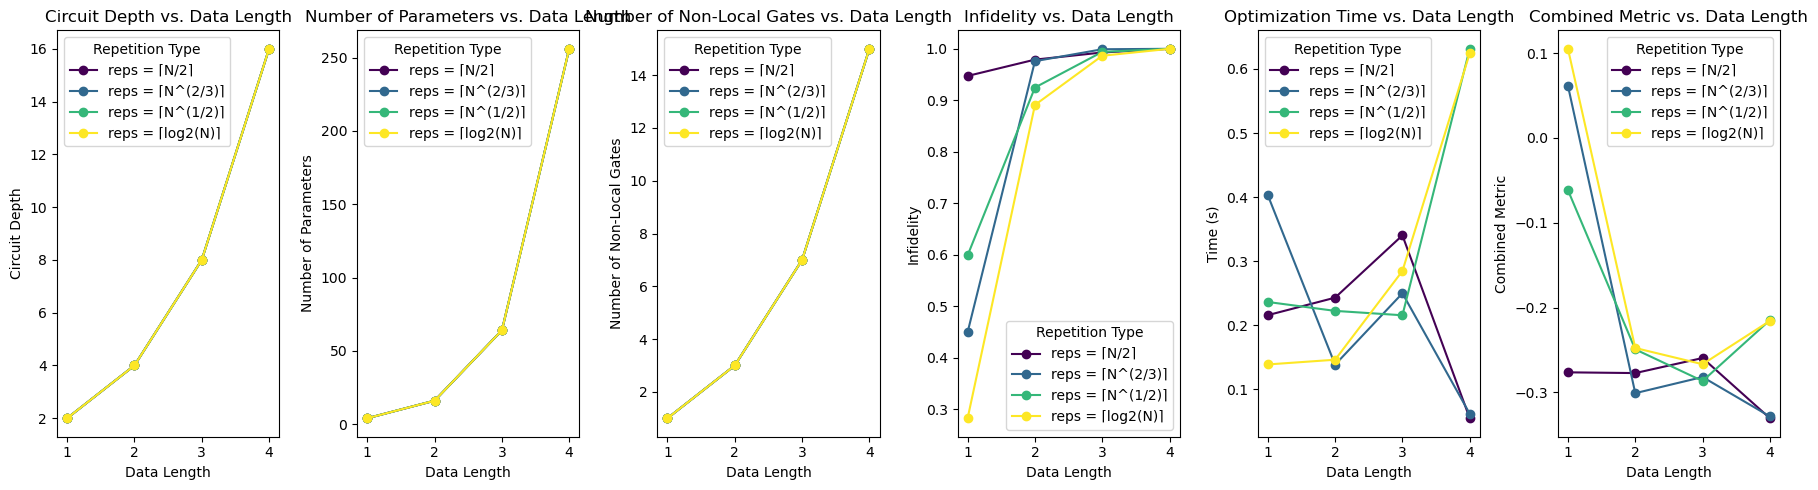

Metric values for N: [-0.27644093344906867, -0.27731522897665495, -0.25955244280296214, -0.3305896705987375]
Metric values for N23: [0.06142789302054723, -0.30101518364268504, -0.28197632194949207, -0.3284456756906919]
Metric values for N12: [-0.06165806204313658, -0.24934049320437413, -0.2866740356696449, -0.2148440694456549]
Metric values for LogN: [0.10510189329442768, -0.24773695066922563, -0.2668845800372857, -0.21575767484514977]
Overall Best Configuration: 1 (LogN)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())

# Create a color cycle for different repetitions
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(rep_list)))

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Define weights for the metric
weight_infidelity = 0.7
weight_time = 0.8
weight_depth = 0.01
weight_parameters = 0.01
weight_nlgates = 0.1
weight_accuracy = 0.3

# Normalize the weights
total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Loop through each repetition type
for rep_type in rep_list:
    # Define a range of data lengths
    data_lengths_range = range(1, 5)
    
    # Initialize lists for the current repetition type
    depths_rep = []
    num_params_rep = []
    nlgates_rep = []
    infidelity_values_slsqp_rep = []
    times_slsqp_rep = []
    accuracies_rep = []

    # Loop through data lengths
    for data_length in data_lengths_range:
        # Define the number of qubits based on data length
        num_qubits = 2 ** data_length

        # Determine the number of repetitions based on the current repetition type
        reps = repetitions[rep_type](num_qubits)

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            ansatz_circuit.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset with the same length as the statevector
        complex_dataset = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
        complex_dataset /= np.linalg.norm(complex_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_rep.append(depth)
        num_params_rep.append(num_param)
        nlgates_rep.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params, data):
            target_circuit = QuantumCircuit(num_qubits)
            for qubit in range(num_qubits):
                target_circuit.ry(params[0], qubit)

            parameter_bindings = {theta: params[0]}
            ansatz_circuit_with_binding = ansatz_circuit.bind_parameters(parameter_bindings)

            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit_with_binding, backend)
            job_target = execute(target_circuit, backend)
            result_ansatz = job_ansatz.result()
            result_target = job_target.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit_with_binding)
            psi_target = result_target.get_statevector(target_circuit)

            data = complex_dataset.flatten()

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), data)) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Generate a validation dataset
        validation_data = (np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits))
        validation_data /= np.linalg.norm(validation_data)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [0.5], method='BFGS', args=(validation_data,))
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_rep.append(infidelity_slsqp)
        times_slsqp_rep.append(end_time - start_time)

        # Calculate accuracy using the fidelity score
        fidelity = 1 - infidelity_slsqp
        accuracies_rep.append(fidelity)

    # Append data for the current repetition type to the main lists
    depths.append(depths_rep)
    num_params.append(num_params_rep)
    nlgates.append(nlgates_rep)
    infidelity_values_slsqp.append(infidelity_values_slsqp_rep)
    times_slsqp.append(times_slsqp_rep)
    data_lengths.append(list(data_lengths_range))
    accuracies.append(accuracies_rep)

# Calculate the weighted metric values for each configuration
for i in range(len(rep_list)):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths[i]))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(len(rep_list)):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)


# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 6, 1)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], depths[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 6, 2)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], num_params[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 6, 3)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], nlgates[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Infidelity vs. Data Length
plt.subplot(1, 6, 4)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], infidelity_values_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 6, 5)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], times_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 6, 6)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], combined_metrics[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Repetition Type')

plt.tight_layout()
plt.show()    

# Print the metric values for each repetition type
for i, rep_type in enumerate(rep_list):
    print(f"Metric values for {rep_type}: {combined_metrics[i]}")

# Find the best configuration across all repetition types
best_overall_configuration = []
best_overall_combined_metric = -float('inf')

for i, rep_type in enumerate(rep_list):
    best_config_index = np.argmax(combined_metrics[i])
    best_config_metric = combined_metrics[i][best_config_index]

    if best_config_metric > best_overall_combined_metric:
        best_overall_combined_metric = best_config_metric
        best_overall_configuration = [data_lengths[i][best_config_index], rep_type]

# Print the result
print(f"Overall Best Configuration: {best_overall_configuration[0]} ({best_overall_configuration[1]})")


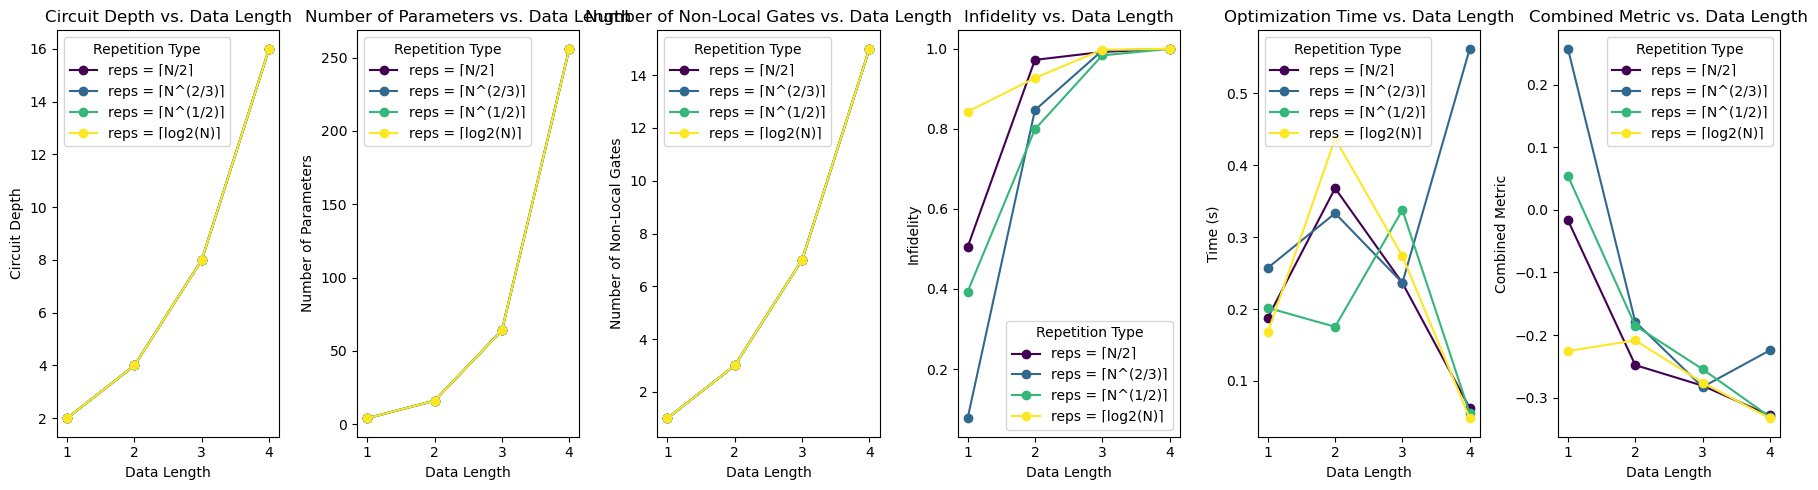

Metric values for N: [-0.016562356156835212, -0.24792373372979112, -0.28083992380772177, -0.3284214070624457]
Metric values for N23: [0.2572420245093071, -0.1788834613017257, -0.2828918588398669, -0.22424725462150194]
Metric values for N12: [0.054009283954180254, -0.1849818205313119, -0.25441129991433425, -0.3306341501805063]
Metric values for LogN: [-0.2254165173138811, -0.20846119875138663, -0.27593079626893224, -0.3328231831360823]
Overall Best Configuration: 1 (N23)


In [23]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())

# Create a color cycle for different repetitions
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(rep_list)))

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Define weights for the metric
weight_infidelity = 0.7
weight_time = 0.8  # Add this line
weight_depth = 0.01
weight_parameters = 0.01
weight_nlgates = 0.1
weight_accuracy = 0.3

# Normalize the weights
total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Loop through each repetition type
for rep_type in rep_list:
    # Define a range of data lengths
    data_lengths_range = range(1, 5)
    
    # Initialize lists for the current repetition type
    depths_rep = []
    num_params_rep = []
    nlgates_rep = []
    infidelity_values_slsqp_rep = []
    times_slsqp_rep = []
    accuracies_rep = []

    # Loop through data lengths
    for data_length in data_lengths_range:
        # Define the number of qubits based on data length
        num_qubits = 2 ** data_length

        # Determine the number of repetitions based on the current repetition type
        reps = repetitions[rep_type](num_qubits)

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            ansatz_circuit.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset with the same length as the statevector
        real_dataset = (np.random.randn(2 ** num_qubits))
        real_dataset /= np.linalg.norm(real_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_rep.append(depth)
        num_params_rep.append(num_param)
        nlgates_rep.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params, data):
            target_circuit = QuantumCircuit(num_qubits)
            for qubit in range(num_qubits):
                target_circuit.ry(params[0], qubit)

            parameter_bindings = {theta: params[0]}
            ansatz_circuit_with_binding = ansatz_circuit.bind_parameters(parameter_bindings)

            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit_with_binding, backend)
            job_target = execute(target_circuit, backend)
            result_ansatz = job_ansatz.result()
            result_target = job_target.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit_with_binding)
            psi_target = result_target.get_statevector(target_circuit)

            data = real_dataset.flatten()

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), data)) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Generate a validation dataset
        validation_data = (np.random.randn(2 ** num_qubits))
        validation_data /= np.linalg.norm(validation_data)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [0.5], method='BFGS', args=(validation_data,))
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_rep.append(infidelity_slsqp)
        times_slsqp_rep.append(end_time - start_time)

        # Calculate accuracy using the fidelity score
        fidelity = 1 - infidelity_slsqp
        accuracies_rep.append(fidelity)

    # Append data for the current repetition type to the main lists
    depths.append(depths_rep)
    num_params.append(num_params_rep)
    nlgates.append(nlgates_rep)
    infidelity_values_slsqp.append(infidelity_values_slsqp_rep)
    times_slsqp.append(times_slsqp_rep)
    data_lengths.append(list(data_lengths_range))
    accuracies.append(accuracies_rep)

# Calculate the weighted metric values for each configuration
for i in range(len(rep_list)):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths[i]))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(len(rep_list)):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)
    


# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 6, 1)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], depths[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 6, 2)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], num_params[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 6, 3)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], nlgates[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Infidelity vs. Data Length
plt.subplot(1, 6, 4)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], infidelity_values_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 6, 5)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], times_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 6, 6)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], combined_metrics[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Repetition Type')

plt.tight_layout()
plt.show()    

# Print the metric values for each repetition type
for i, rep_type in enumerate(rep_list):
    print(f"Metric values for {rep_type}: {combined_metrics[i]}")

# Find the best configuration across all repetition types
best_overall_configuration = []
best_overall_combined_metric = -float('inf')

for i, rep_type in enumerate(rep_list):
    best_config_index = np.argmax(combined_metrics[i])
    best_config_metric = combined_metrics[i][best_config_index]

    if best_config_metric > best_overall_combined_metric:
        best_overall_combined_metric = best_config_metric
        best_overall_configuration = [data_lengths[i][best_config_index], rep_type]

# Print the result
print(f"Overall Best Configuration: {best_overall_configuration[0]} ({best_overall_configuration[1]})")


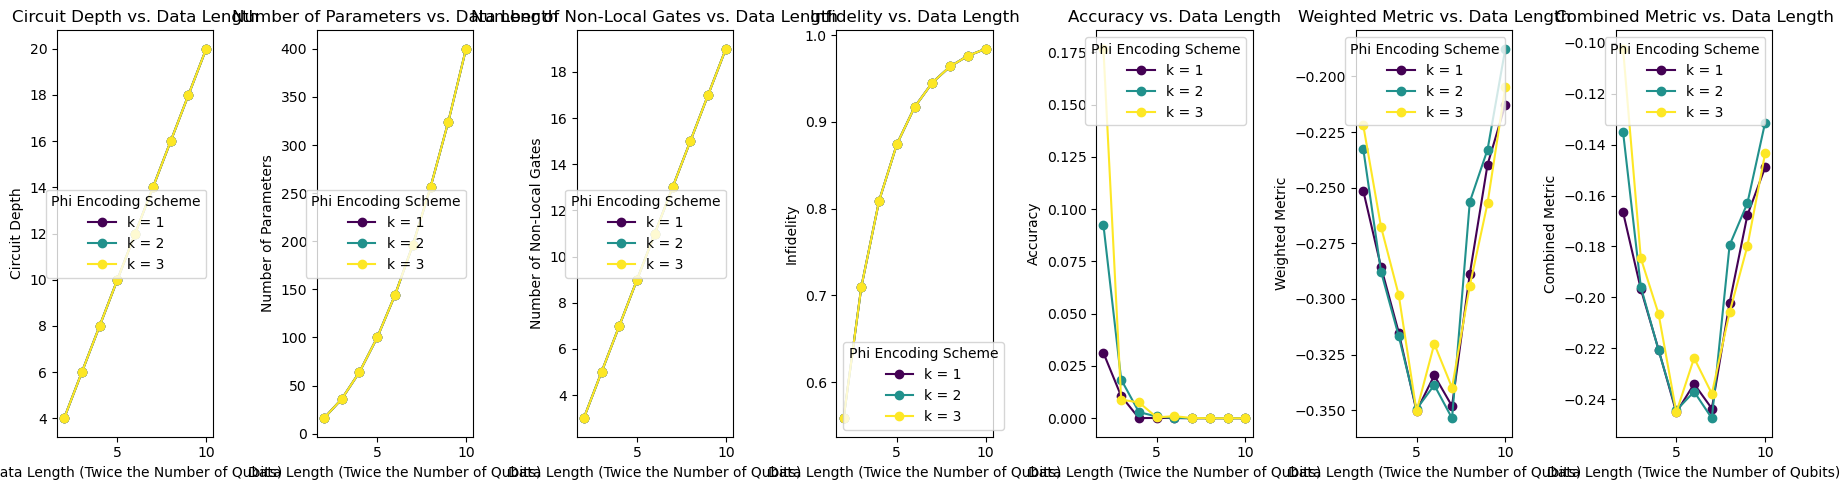

Best Configurations (k = 1):
  Repetition: N, Best Configuration: 2
  Repetition: N23, Best Configuration: 2
  Repetition: N12, Best Configuration: 2
  Repetition: LogN, Best Configuration: 2
Best Configurations (k = 2):
  Repetition: N, Best Configuration: 2
  Repetition: N23, Best Configuration: 2
  Repetition: N12, Best Configuration: 2
  Repetition: LogN, Best Configuration: 2
Best Configurations (k = 3):
  Repetition: N, Best Configuration: 2
  Repetition: N23, Best Configuration: 2
  Repetition: N12, Best Configuration: 2
  Repetition: LogN, Best Configuration: 2


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from scipy.optimize import minimize
import time

# Define kernel functions (eq_8, eq_8_1, eq_8_2)
def eq_8(x, k):
    if k == 1:
        phi = x[0]
    elif k == 2:
        phi = x[0] if len(x) == 1 else x[0] * x[1]
    elif k == 3:
        phi = x[0] if len(x) == 1 else x[0] * x[1] * x[2]
    return (np.pi / 2) * phi

# Initialize lists to store data
data_lengths = list(range(2, 11))  # Data lengths from 2 to 10
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []

# Create a color cycle for different data points
color_cycle = plt.cm.viridis(np.linspace(0, 1, 3))

# Define weights for the metric
weight_infidelity = 0.7  # You can adjust the weight based on importance
weight_time = 0.8  # You can adjust the weight based on importance
weight_depth = 0.01  # You can adjust the weight based on importance
weight_parameters = 0.01  # You can adjust the weight based on importance
weight_nlgates = 0.1  # You can adjust the weight based on importance
weight_accuracy = 0.3  # You can adjust the weight based on importance

total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates

# Normalize the weights to ensure they add up to 1.
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight

# Initialize lists to store the weighted metric values, accuracies, and combined metrics
weighted_metrics = []
accuracies = []
combined_metrics = []

# Define repetition types
repetition_types = ['N', 'N23', 'N12', 'LogN']

# Iterate over different encoding schemes (k values)
for k_value in range(1, 4):
    depths_k = []
    num_params_k = []
    nlgates_k = []
    infidelity_values_slsqp_k = []
    times_slsqp_k = []
    accuracies_k = []

    for data_length in data_lengths:
        num_qubits = 2 * data_length

        ansatz_circuit = QuantumCircuit(num_qubits)

        for qubit in range(num_qubits):
            ansatz_circuit.ry(eq_8([np.pi / 2], k_value), qubit)

        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        target_circuit = QuantumCircuit(num_qubits)

        complex_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        complex_dataset /= np.linalg.norm(complex_dataset)

        backend = Aer.get_backend('statevector_simulator')

        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_k.append(depth)
        num_params_k.append(num_param)
        nlgates_k.append(nlgate_count)

        def objective_function(params):
            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit, backend)
            result_ansatz = job_ansatz.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit)

            target_circuit = QuantumCircuit(num_qubits)

            for qubit in range(num_qubits):
                target_circuit.ry(eq_8(params, k_value), qubit)

            job_target = execute(target_circuit, backend)
            result_target = job_target.result()
            psi_target = result_target.get_statevector(target_circuit)

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), psi_target).flatten()) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        start_time = time.time()
        result_slsqp = minimize(objective_function, [np.pi / 2], method='BFGS')
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_k.append(infidelity_slsqp)
        times_slsqp_k.append(end_time - start_time)

        # Calculate accuracy using a validation dataset (here we use fidelity as accuracy)
        validation_dataset = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
        validation_dataset /= np.linalg.norm(validation_dataset)

        job_target = execute(target_circuit, backend)
        result_target = job_target.result()
        psi_target = result_target.get_statevector(target_circuit)

        fidelity = np.abs(np.dot(np.conj(psi_target), validation_dataset).flatten()) ** 2
        accuracy = fidelity  # Accuracy is calculated as fidelity for this example
        accuracies_k.append(accuracy)

    depths.append(depths_k)
    num_params.append(num_params_k)
    nlgates.append(nlgates_k)
    infidelity_values_slsqp.append(infidelity_values_slsqp_k)
    times_slsqp.append(times_slsqp_k)
    accuracies.append(accuracies_k)

# Calculate the weighted metric values for each configuration
for i in range(3):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
weight_metric = 0.7

combined_metrics = []

for i in range(3):
    combined_metric = [
        weight_metric * metric + weight_accuracy * accuracy
        for metric, accuracy in zip(weighted_metrics[i], accuracies[i])
    ]
    combined_metrics.append(combined_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 7, 1)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, depths[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 7, 2)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, num_params[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 7, 3)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, nlgates[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Infidelity vs. Data Length
plt.subplot(1, 7, 4)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, infidelity_values_slsqp[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Accuracy vs. Data Length
plt.subplot(1, 7, 5)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, accuracies[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Weighted Metric vs. Data Length
plt.subplot(1, 7, 6)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, weighted_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Weighted Metric')
plt.title('Weighted Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 7, 7)
for i, k_value in enumerate(range(1, 4)):
    plt.plot(data_lengths, combined_metrics[i], marker='o', label=f'k = {k_value}', color=color_cycle[i])
plt.xlabel('Data Length (Twice the Number of Qubits)')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Phi Encoding Scheme')

plt.tight_layout()
plt.show()

# Find the best configuration for each k value and repetition type
best_configurations_info = []
for k_value in range(1, 4):
    best_configurations_k = []
    for rep_type in repetition_types:
        index = repetition_types.index(rep_type)
        best_config_index = np.argmax(combined_metrics[k_value - 1][index])
        best_configurations_k.append((rep_type, data_lengths[best_config_index]))
    best_configurations_info.append((k_value, best_configurations_k))

# Print the best configuration for each k value and repetition type
for i, (k_value, best_configurations_k) in enumerate(best_configurations_info):
    print(f"Best Configurations (k = {k_value}):")
    for rep_type, best_configuration in best_configurations_k:
        print(f"  Repetition: {rep_type}, Best Configuration: {best_configuration}")


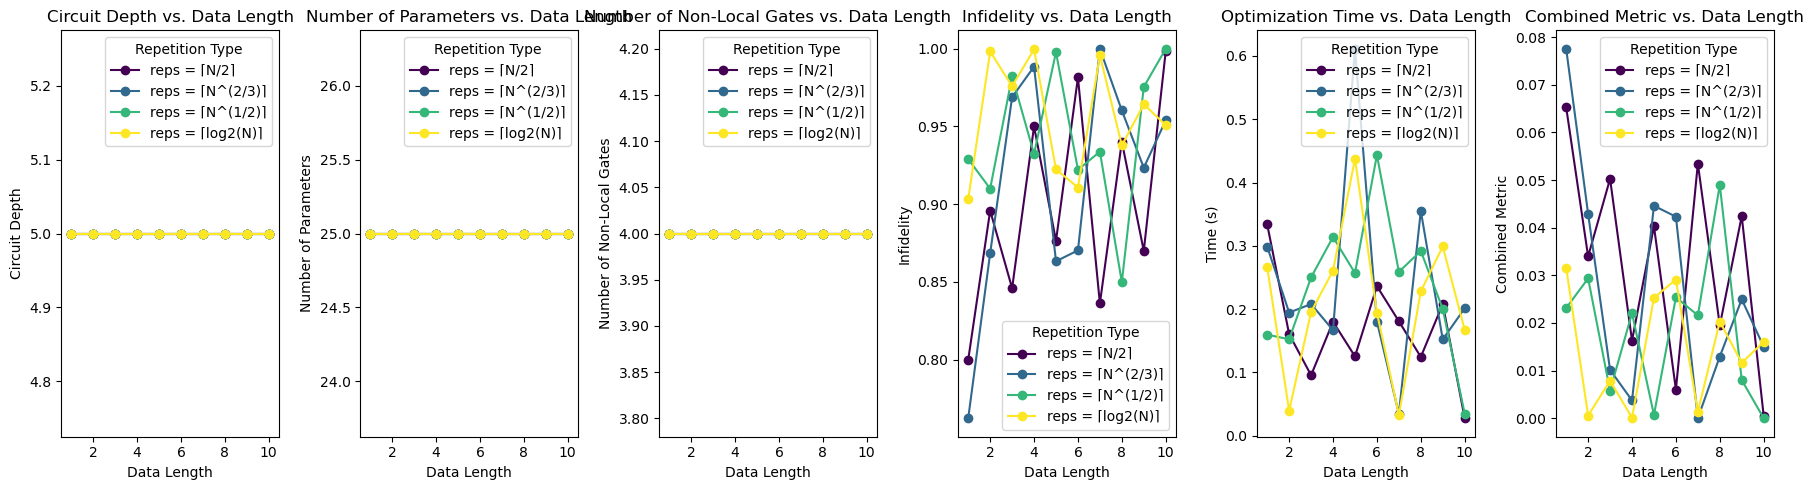

Metric values for N: [0.0652603827254171, 0.03396352093081423, 0.050243338042620704, 0.016292811051181612, 0.0403100387604344, 0.0060159209380285785, 0.053448273368566744, 0.01947911317913867, 0.042430881120024716, 0.0005095186956781345]
Metric values for N23: [0.07753625071932214, 0.04290434864097395, 0.010148763402096458, 0.00374012566754807, 0.04458736820380349, 0.042305850496302075, 2.109766246958534e-06, 0.012943695881644634, 0.024952929633952094, 0.015014840083078965]
Metric values for N12: [0.023128692095508406, 0.029349688920221367, 0.0057997204872494304, 0.02207751777235266, 0.0006855849239186397, 0.025381015703136386, 0.021589788168551317, 0.0489806223528987, 0.008016891579500592, 6.334426715044086e-09]
Metric values for LogN: [0.03158347645251061, 0.0005592129350067167, 0.00786875778968632, 0.00010392151372914575, 0.025277138483295037, 0.029115852180898738, 0.0013508342699121133, 0.02027539616480031, 0.011638659080705615, 0.016020336513079162]
Overall Best Configuration: 1 (

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
from scipy.optimize import minimize
import time

# Define the 'theta' parameter
theta = Parameter('theta')

# Define the repetitions dictionary
repetitions = {
    'N': lambda N: int(np.ceil(N / 2)),
    'N23': lambda N: int(np.ceil(N**(2/3))),
    'N12': lambda N: int(np.ceil(np.sqrt(N))),
    'LogN': lambda N: int(np.ceil(np.log2(N))),
}
rep_comp = {'N': (0, 'reps = ⌈N/2⌉'),
            'N23': (1, 'reps = ⌈N^(2/3)⌉'),
            'N12': (2, 'reps = ⌈N^(1/2)⌉'),
            'LogN': (3, 'reps = ⌈log2(N)⌉')}

# Initialize lists to store data for each repetition
rep_list = list(repetitions.keys())

# Create a color cycle for different repetitions
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(rep_list)))

# Initialize lists to store data
data_lengths = []
depths = []
num_params = []
nlgates = []
infidelity_values_slsqp = []
times_slsqp = []
accuracies = []

# Initialize lists to store the weighted metric values and combined metrics
weighted_metrics = []
combined_metrics = []

# Define weights for the metric
weight_infidelity = 0.7
weight_time = 0.1
weight_depth = 0.01
weight_parameters = 0.01
weight_nlgates = 0.1
weight_accuracy = 0.3

# Normalize the weights
total_weight = weight_infidelity + weight_time + weight_depth + weight_parameters + weight_nlgates
weight_infidelity /= total_weight
weight_time /= total_weight
weight_depth /= total_weight
weight_parameters /= total_weight
weight_nlgates /= total_weight
weight_accuracy /= total_weight

# Loop through each repetition type
for rep_type in rep_list:
    # Define a range of data lengths
    data_lengths_range = range(1, 11)
    
    # Initialize lists for the current repetition type
    depths_rep = []
    num_params_rep = []
    nlgates_rep = []
    infidelity_values_slsqp_rep = []
    times_slsqp_rep = []
    accuracies_rep = []

    num_qubits = 5
    # Loop through data lengths
    for data_length in data_lengths_range:
        # Define the number of qubits based on data length
       

        # Determine the number of repetitions based on the current repetition type
        reps = repetitions[rep_type](num_qubits)

        # Create the ansatz circuit
        ansatz_circuit = QuantumCircuit(num_qubits)
        for qubit in range(num_qubits):
            ansatz_circuit.ry(theta, qubit)
        for qubit in range(num_qubits - 1):
            ansatz_circuit.cx(qubit, qubit + 1)

        # Generate a complex dataset with the same length as the statevector
        real_dataset = (np.random.randn(2 ** num_qubits))
        real_dataset /= np.linalg.norm(real_dataset)

        # Calculate circuit properties
        depth = ansatz_circuit.depth()
        num_param = num_qubits * depth

        if 'cx' in ansatz_circuit.count_ops():
            nlgate_count = ansatz_circuit.count_ops()['cx']
        else:
            nlgate_count = 0

        depths_rep.append(depth)
        num_params_rep.append(num_param)
        nlgates_rep.append(nlgate_count)

        # Define the objective function to minimize infidelity
        def objective_function(params, data):
            target_circuit = QuantumCircuit(num_qubits)
            for qubit in range(num_qubits):
                target_circuit.ry(params[0], qubit)

            parameter_bindings = {theta: params[0]}
            ansatz_circuit_with_binding = ansatz_circuit.bind_parameters(parameter_bindings)

            backend = Aer.get_backend('statevector_simulator')
            job_ansatz = execute(ansatz_circuit_with_binding, backend)
            job_target = execute(target_circuit, backend)
            result_ansatz = job_ansatz.result()
            result_target = job_target.result()
            psi_ansatz = result_ansatz.get_statevector(ansatz_circuit_with_binding)
            psi_target = result_target.get_statevector(target_circuit)

            data = real_dataset.flatten()

            fidelity = np.abs(np.dot(np.conj(psi_ansatz), data)) ** 2
            infidelity = 1 - fidelity
            return float(infidelity)

        # Generate a validation dataset
        validation_data = (np.random.randn(2 ** num_qubits))
        validation_data /= np.linalg.norm(validation_data)

        # Optimize the circuit parameters using SLSQP
        start_time = time.time()
        result_slsqp = minimize(objective_function, [0.5], method='SLSQP', args=(validation_data,))
        end_time = time.time()
        infidelity_slsqp = result_slsqp.fun
        infidelity_values_slsqp_rep.append(infidelity_slsqp)
        times_slsqp_rep.append(end_time - start_time)

        # Calculate accuracy using the fidelity score
        fidelity = 1 - infidelity_slsqp
        accuracies_rep.append(fidelity)

    # Append data for the current repetition type to the main lists
    depths.append(depths_rep)
    num_params.append(num_params_rep)
    nlgates.append(nlgates_rep)
    infidelity_values_slsqp.append(infidelity_values_slsqp_rep)
    times_slsqp.append(times_slsqp_rep)
    data_lengths.append(list(data_lengths_range))
    accuracies.append(accuracies_rep)

# Calculate the weighted metric values for each configuration
for i in range(len(rep_list)):
    weighted_metric = [
        weight_infidelity * (1 - infidelity_values_slsqp[i][j]) -
        weight_time * (1 / (1 + times_slsqp[i][j])) -
        weight_depth * (1 / (1 + depths[i][j])) -
        weight_parameters * (1 / (1 + num_params[i][j])) -
        weight_nlgates * (1 / (1 + nlgates[i][j]))
        for j in range(len(data_lengths[i]))
    ]
    weighted_metrics.append(weighted_metric)

# Calculate the combined metric (considering both weighted metric and accuracy)
combined_metrics = []

for i in range(len(rep_list)):
    combined_metric = [
        weight_accuracy * accuracy
        for accuracy in accuracies[i]
    ]
    combined_metrics.append(combined_metric)

# Create subplots for each property
plt.figure(figsize=(18, 5))

# Plot Circuit Depth vs. Data Length
plt.subplot(1, 6, 1)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], depths[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Parameters vs. Data Length
plt.subplot(1, 6, 2)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], num_params[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Number of Non-Local Gates vs. Data Length
plt.subplot(1, 6, 3)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], nlgates[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Number of Non-Local Gates')
plt.title('Number of Non-Local Gates vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Infidelity vs. Data Length
plt.subplot(1, 6, 4)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], infidelity_values_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Infidelity')
plt.title('Infidelity vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Optimization Time vs. Data Length
plt.subplot(1, 6, 5)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], times_slsqp[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Time (s)')
plt.title('Optimization Time vs. Data Length')
plt.legend(title='Repetition Type')

# Plot Combined Metric vs. Data Length
plt.subplot(1, 6, 6)
for i, rep_type in enumerate(rep_list):
    plt.plot(data_lengths[i], combined_metrics[i], marker='o', label=rep_comp[rep_type][1], color=color_cycle[i])
plt.xlabel('Data Length')
plt.ylabel('Combined Metric')
plt.title('Combined Metric vs. Data Length')
plt.legend(title='Repetition Type')

plt.tight_layout()
plt.show()

# Print the metric values for each repetition type
for i, rep_type in enumerate(rep_list):
    print(f"Metric values for {rep_type}: {combined_metrics[i]}")

# Find the best configuration across all repetition types
best_overall_configuration = []
best_overall_combined_metric = -float('inf')

for i, rep_type in enumerate(rep_list):
    best_config_index = np.argmax(combined_metrics[i])
    best_config_metric = combined_metrics[i][best_config_index]

    if best_config_metric > best_overall_combined_metric:
        best_overall_combined_metric = best_config_metric
        best_overall_configuration = [data_lengths[i][best_config_index], rep_type]

# Print the result
print(f"Overall Best Configuration: {best_overall_configuration[0]} ({best_overall_configuration[1]})")
